# RL on E-puck

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
    
def plot_centiles(ss, xmax=0, smooth_factor=1, color="orange", filename="plot"):
    
    if smooth_factor > 1:
        ns = []
        for ei in range(0,len(ss)):
            ne = smoothen(ss[ei], smooth_factor)
            ns.append(ne)
        ss = ns
    l = len(ss[0])
    xs = np.linspace(0, l-1, l)
    mins = np.min(ss, axis=0)
    maxs = np.max(ss, axis=0)
    q1s = np.percentile(ss, 25, axis=0) 
    medians = np.percentile(ss, 50, axis=0)
    q3s = np.percentile(ss, 75, axis=0)
    
    bg_color = 'white'
    fg_color = 'black'
    fig = plt.figure(facecolor=bg_color, edgecolor=fg_color)
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor(bg_color)
    ax.xaxis.set_tick_params(color=fg_color, labelcolor=fg_color)
    ax.yaxis.set_tick_params(color=fg_color, labelcolor=fg_color)
    ax.spines['bottom'].set_color(fg_color)
    ax.spines['left'].set_color(fg_color)
    ax.spines['top'].set_color(bg_color)
    ax.spines['right'].set_color(bg_color)
    ax.xaxis.label.set_color(fg_color)
    ax.yaxis.label.set_color(fg_color)
    plt.grid(True)
    plt.xlabel('Episodes')
    plt.ylabel('Steps')
    
    if color == "green":
        mean_color = 'seagreen'
        stdev_color = '#88ff99'
        maxmin_color = '#ccffdd'  
    else:
        mean_color = '#ff8000'
        stdev_color = '#ffb266'
        maxmin_color = '#ffcc99'
        

    if xmax != 0:
        plt.gca().set_ylim(top=xmax)    

    line1, = plt.plot(xs, medians, color=mean_color)
    line2, = plt.plot(xs, q3s, color=stdev_color) #, alpha=0.5)
    line3, = plt.plot(xs, q1s, color=stdev_color) #, alpha=0.5)
    line4, = plt.plot(xs, maxs, color=maxmin_color, alpha=0.5)
    line5, = plt.plot(xs, mins, color=maxmin_color, alpha=0.5)
    plt.fill_between(xs, medians, mins, facecolor=maxmin_color, alpha=0.8)
    plt.fill_between(xs, medians, maxs, facecolor=maxmin_color, alpha=0.8)
    plt.fill_between(xs, q1s, q3s, facecolor=stdev_color)
    plt.xticks(np.arange(0, l, step=l/10))
    legend = plt.legend((line1, line2, line5), ('Median', 'Quartile 1/3', 'Maximum/Minimum'))
    for text in legend.get_texts():
        text.set_color(fg_color)
    frame = legend.get_frame()
    frame.set_facecolor(bg_color)
    frame.set_edgecolor(bg_color)
    plt.show()
    fig.savefig(filename+".png", dpi=500, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor()) 

    
def smoothen(l, f):
    nl = np.zeros(len(l)-f)
    for li in range(0,len(l)-f):
        nl[li] = np.mean(l[li:li+f])
    return nl



In [9]:
import pandas as pd

def print_table(ss, v):
    ssize = len(ss[0])
    idxs = np.linspace(0,ssize-1,v,dtype=int)
    mins = [np.amin(ss, axis=0)[i] for i in idxs]
    q1s = [np.percentile(ss, 25, axis=0)[i] for i in idxs] 
    medians = [np.percentile(ss, 50, axis=0)[i] for i in idxs]
    q3s = [np.percentile(ss, 75, axis=0)[i] for i in idxs]
    maxs = [np.amax(ss, axis=0)[i] for i in idxs]

    data = zip(idxs, mins, q1s, medians, q3s, maxs)
    data = [list(d) for d in data]
    table = pd.DataFrame(data, columns=["Step", "Min", "1st Quartile", "Median", "3rd quartile", "Max"])
    print(table)

In [27]:
 from scipy.stats import mannwhitneyu

def print_MW(smaller, greater, v):
    ssize = len(smaller[0])
    idxs = np.linspace(0,ssize-1,v,dtype=int)
    ps = []
    for (s, g) in zip(np.transpose(smaller), np.transpose(greater)):
        if s.all() == g.all():
            p = 0.0
        else:
            u, p = mannwhitneyu(s, g, alternative='less')
        ps.append(p)
    psi = [ps[i] for i in idxs]
    table = pd.DataFrame(np.array(psi).reshape(-1, len(psi)), columns=idxs)
    print(table)

## Data from MATLAB/Gazebo E-puck Simulations

### McCallum Proximity

In [11]:
ts_nsm_epuck = []
ts_nsm_epuck.append([70,8,2,4,6,1,1,2,16,1,10,13,10,16,2,3,4,8,4,1,2,2,2,6,19,15,3,5,2,15,14,10,3,7,7,28,1,3,6,6,50,15,15,10,1,13,9,14,2,3,19,13,10,3,15,12,10,10,3,2,6,6,4,1,4,19,2,13,7,5,6,8,8,2,9,6,69,4,1,5,3,3,1,1,42,5,4,3,4,14,2,15,7,18,12,6,10,3,11,2])
ts_nsm_epuck.append([19,27,44,26,7,28,28,10,10,4,37,16,6,5,53,23,8,7,6,6,6,37,24,9,4,3,37,9,3,2,11,7,7,2,33,3,1,15,1,24,3,4,5,7,4,14,1,6,27,31,7,11,4,1,4,2,2,5,1,7,1,2,7,3,9,4,14,1,6,3,13,6,8,2,3,1,13,4,15,5,15,21,24,14,19,1,14,1,20,3,17,15,36,56,1,3,2,1,22,6])
ts_nsm_epuck.append([4,3,4,9,5,2,11,13,5,1,1,5,1,6,2,6,8,2,2,5,1,1,24,49,12,7,2,1,12,6,4,14,15,2,2,13,8,2,8,8,8,6,6,10,9,2,17,13,1,6,6,7,4,19,11,4,4,152,37,8,31,2,1,1,37,4,3,4,4,12,2,1,3,8,2,14,16,10,6,2,42,14,1,29,4,4,2,4,2,1,10,5,9,12,1,1,1,3,14,10])
ts_nsm_epuck.append([60,1,7,4,5,1,41,4,9,11,5,3,1,5,2,1,3,1,18,5,2,20,10,18,4,1,5,15,11,9,23,9,6,2,1,8,10,1,8,5,1,4,1,6,29,1,10,7,9,19,11,4,5,22,2,6,2,4,10,8,16,10,5,58,2,3,3,1,15,18,20,4,1,2,2,24,8,18,3,1,2,10,2,60,3,2,3,9,15,2,6,5,10,11,10,10,8,5,1,9])
ts_nsm_epuck.append([108,37,16,1,12,2,2,2,4,3,4,11,173,2,2,4,10,6,2,1,3,4,9,3,2,5,2,3,3,14,3,1,4,7,6,4,1,2,4,58,3,4,12,2,4,10,5,3,1,2,13,1,1,4,10,2,51,10,6,4,9,3,1,9,3,4,7,2,9,6,3,7,5,11,49,8,15,3,5,2,6,3,1,4,50,5,16,3,2,6,2,8,1,15,1,6,2,4,2,2])
ts_nsm_epuck.append([5,1,13,121,3,20,2,9,18,29,3,3,3,6,2,7,18,3,3,5,5,12,8,7,6,2,6,11,14,14,8,3,1,3,8,6,19,7,15,6,2,3,2,7,17,6,8,31,7,2,5,18,48,2,9,1,18,6,4,16,13,8,7,4,2,6,1,7,1,11,5,15,291,4,2,34,4,1,142,20,5,8,18,9,6,12,14,7,8,1,4,1,5,3,3,10,1,3,8,2])
ts_nsm_epuck.append([12,93,1,21,17,1,40,9,26,4,2,4,16,6,1,23,1,136,56,3,7,5,21,1,2,9,12,37,19,16,2,6,8,12,7,13,12,6,4,2,3,21,7,5,33,1,1,6,3,1,1,5,10,9,2,5,10,1,15,3,8,8,2,8,3,1,7,2,7,2,1,4,6,3,1,5,6,16,2,1,8,12,6,11,23,1,1,2,1,17,6,7,35,3,13,5,27,1,47,85])
ts_nsm_epuck.append([12,26,5,7,30,1,30,3,3,5,11,5,1,5,7,3,1,1,5,2,2,1,4,1,2,4,3,28,3,6,2,3,7,16,8,5,2,2,2,3,11,19,9,10,3,4,2,2,6,8,6,5,1,2,8,5,13,33,21,5,11,5,1,2,4,6,7,1,9,16,7,3,31,4,2,3,3,6,23,44,1,1,1,1,9,5,2,14,1,69,5,5,24,4,8,5,17,3,5,1])
ts_nsm_epuck.append([6,1,3,2,1,5,25,4,22,2,1,11,9,12,3,1,7,1,4,3,18,16,188,10,9,22,8,7,1,5,21,2,5,1,2,9,2,4,4,7,21,14,9,37,16,8,5,12,36,1,3,12,3,6,4,14,5,2,13,1,1,7,16,2,8,5,3,6,6,24,2,2,110,10,7,1,1,6,10,3,1,2,5,8,2,2,8,12,2,4,5,4,19,4,5,8,13,8,8,12])
ts_nsm_epuck.append([4,17,718,79,9,15,8,34,6,1,62,5,10,11,8,2,8,4,5,5,18,6,6,4,4,13,11,1,3,2,4,4,15,6,7,1,6,15,1,4,15,11,2,3,2,17,2,6,20,11,19,1,1,3,7,14,42,3,2,4,7,2,5,3,15,12,3,43,2,9,3,1,1,7,7,1,2,10,19,9,10,5,4,4,2,1,3,53,2,1,30,2,5,7,2,2,1,13,4,1])
ts_nsm_epuck.append([11,73,16,1,2,8,27,11,3,12,4,2,2,11,16,2,3,10,7,2,6,11,2,4,4,3,1,4,10,13,11,9,2,10,3,3,8,3,3,1,5,9,5,15,31,54,1,23,20,2,5,11,2,23,6,1,10,1,4,1,5,11,4,2,12,16,1,10,5,2,5,5,5,19,7,1,2,33,1,3,12,6,41,67,2,17,20,4,1,9,1,5,3,7,18,3,1,24,6,6])
ts_nsm_epuck.append([5,5,31,3,7,3,1,3,3,6,5,1,4,5,4,6,2,4,7,1,4,2,14,1,2,2,1,2,1,2,4,2,4,1,32,4,2,1,16,2,9,9,8,12,1,1,1,4,4,4,3,11,4,3,2,3,1,1,5,1,4,1,4,14,5,1,7,18,1,3,5,5,5,8,6,8,5,1,4,5,1,6,1,3,5,2,3,11,5,5,3,14,2,6,2,7,1,1,4,16])
ts_nsm_epuck.append([63,7,6,13,5,3,3,5,4,6,10,6,3,391,1,1,34,12,2,10,2,2,8,1,6,2,5,3,2,7,10,9,5,8,3,1,14,2,3,11,23,5,1,3,5,4,9,1,2,6,1,50,4,5,4,15,2,16,12,5,13,6,2,4,4,3,15,1,1,23,31,19,3,4,4,1,5,5,6,9,7,5,2,31,4,20,3,1,3,4,2,17,2,7,3,41,2,6,9,3])
ts_nsm_epuck.append([6,2,7,71,9,1,3,3,3,21,3,3,12,2,18,7,6,234,9,8,5,9,1,7,8,69,29,4,13,19,5,5,7,8,3,3,10,20,5,5,1,2,3,3,19,5,6,11,13,2,2,15,3,1,10,1,1,13,9,5,31,10,8,11,8,2,3,34,3,7,9,14,3,2,12,2,6,5,8,3,14,8,8,13,2,2,7,4,6,14,5,7,6,4,1,5,7,3,1,1])
ts_nsm_epuck.append([2,2,10,13,1,7,1,2,1,2,3,8,10,1,8,21,4,13,18,1,2,11,1,9,6,2,1,16,7,2,12,9,1,1,1,1,8,11,7,3,4,2,20,2,4,17,15,1,3,3,3,3,2,10,3,2,2,1,10,2,1,2,10,16,1,4,10,2,15,4,4,9,3,7,1,4,3,3,4,10,9,5,53,3,31,4,3,13,10,16,2,35,18,1,31,1,47,7,4,5])
ts_nsm_epuck.append([41,1,2,1,5,31,8,1,1,2,16,19,7,25,3,5,3,15,1,6,17,20,14,2,23,3,1,1,6,5,2,8,5,34,3,5,3,10,19,5,2,39,7,17,6,23,8,18,3,1,3,2,1,10,3,8,8,17,9,14,1,25,2,6,2,7,1,12,27,5,15,15,27,19,11,9,12,11,10,3,3,4,1,38,2,9,1,18,7,12,5,21,2,12,13,6,3,8,28,14])
ts_nsm_epuck.append([7,56,82,45,15,24,15,34,2,25,17,38,22,10,2,12,9,23,41,7,4,1,9,16,1,2,2,12,7,1,3,7,3,10,1,3,2,6,8,4,10,48,8,1,6,2,8,5,1,3,1,1,10,12,4,6,5,10,8,66,64,2,12,1,1,2,3,14,7,16,9,2,12,5,21,916,137,25,42,10,2,5,55,12,2,1,13,12,1,5,16,8,3,25,6,2,19,1,3,2])
ts_nsm_epuck.append([21,66,79,160,60,18,16,7,38,111,10,4,4,3,7,14,19,36,16,25,9,5,17,9,9,16,11,4,7,2,4,1,1,2,28,1,1,3,2,2,5,32,3,1,8,15,2,8,25,3,17,19,11,7,1,6,1,28,1,10,11,11,4,2,4,21,12,3,18,1,2,13,6,3,9,1,1,3,6,7,2,3,1,21,2,2,10,10,2,3,12,25,8,5,6,34,4,6,6,10])
ts_nsm_epuck.append([2,27,4,10,3,81,6,2,79,8,4,9,22,3,3,17,47,8,4,2,6,12,5,5,10,2,5,1,8,1,12,6,7,20,4,3,2,4,5,11,5,7,1,7,4,22,9,29,13,5,5,2,78,5,10,6,4,3,12,5,16,5,8,10,5,9,11,17,2,3,23,6,5,20,1,2,3,10,1,1,1,2,5,6,9,11,38,7,9,18,42,5,10,3,3,1,43,3,16,1])
ts_nsm_epuck.append([11,12,34,30,511,265,12,9,10,4,7,8,2,7,7,2,3,16,3,4,4,14,15,7,3,2,6,5,2,1,1,3,2,2,9,30,9,67,3,1,37,3,2,8,15,3,15,9,9,2,16,9,4,7,5,3,2,9,4,32,9,4,2,5,3,3,1,4,4,1,3,3,9,1,22,7,10,3,1,4,2,2,9,1,9,17,11,30,1,13,4,4,16,1,1,7,2,15,8,4
])

ps_nsm_epuck = []
ps_nsm_epuck.append([0.00,3.00,5.00,7.00,7.17,8.00,0.00,8.00,10.00,8.00,11.38,10.67,8.88,12.25,12.00,13.33,12.50,12.75,8.67,8.00,12.00,12.00,8.00,15.00,12.41,15.92,15.50,16.50,12.00,11.70,15.50,9.33,14.00,13.33,15.17,12.00,0.00,15.50,8.40,12.67,11.56,7.30,13.00,14.67,0.00,12.00,13.25,12.70,0.00,14.00,13.75,13.92,14.10,14.00,12.08,11.50,13.00,13.50,14.67,12.00,13.00,18.50,12.33,8.00,13.50,12.94,12.00,10.38,13.50,13.00,15.00,11.80,13.86,10.00,12.71,12.80,7.93,12.67,8.00,13.50,12.33,11.00,8.00,8.00,10.06,13.80,12.67,15.00,15.67,11.08,15.00,10.67,13.71,11.71,11.50,13.00,15.00,12.00,9.83,12.00])
ps_nsm_epuck.append([0.00,3.93,9.69,8.83,12.14,12.36,11.23,12.20,12.88,14.75,14.75,14.73,17.60,13.40,18.85,18.14,19.25,19.71,20.67,15.80,14.40,20.94,12.05,21.00,15.00,16.00,14.93,16.00,16.00,11.50,13.44,11.29,13.67,10.50,14.72,12.00,8.00,12.54,8.00,14.06,15.33,14.00,15.50,14.25,19.50,12.90,0.00,11.75,10.73,6.57,9.00,15.71,11.50,8.00,12.75,10.50,11.00,12.40,0.00,12.75,8.00,11.00,11.40,11.33,10.14,13.75,13.00,8.00,14.00,12.00,11.36,12.00,11.60,8.00,12.67,8.00,11.70,10.00,8.30,11.50,10.47,13.92,8.76,13.50,10.06,8.00,15.80,8.00,15.15,11.67,14.79,16.09,11.14,14.07,0.00,11.33,12.00,8.00,12.13,13.17])
ps_nsm_epuck.append([0.00,1.67,3.67,5.25,6.25,8.00,6.25,11.00,9.33,8.00,8.00,12.80,8.00,13.33,0.00,14.40,8.50,12.00,12.00,13.00,8.00,8.00,9.82,11.80,11.22,14.14,12.00,8.00,13.78,9.40,14.00,10.85,12.36,12.00,16.00,8.82,10.14,12.00,9.83,11.00,14.00,14.83,17.33,13.14,12.17,10.50,13.36,19.56,0.00,10.80,11.20,15.50,13.50,8.93,12.67,13.25,11.50,10.11,15.35,13.00,14.84,12.00,8.00,8.00,14.06,11.50,14.67,8.00,14.33,16.18,12.00,8.00,12.00,14.40,12.00,18.58,8.80,15.00,11.80,15.00,10.79,11.64,8.00,12.44,9.67,11.00,12.00,13.00,8.00,8.00,12.00,13.40,11.12,12.00,8.00,8.00,8.00,9.00,11.45,11.78])
ps_nsm_epuck.append([0.00,2.00,4.50,5.33,5.00,8.00,8.00,6.33,10.17,11.43,11.25,11.50,8.00,10.80,12.00,8.00,12.67,8.00,10.47,15.00,8.00,14.69,10.67,11.00,12.25,8.00,10.75,12.75,10.00,13.67,11.41,14.88,12.67,12.00,8.00,14.40,12.30,8.00,13.00,10.50,8.00,11.75,0.00,15.00,8.59,8.00,17.00,12.20,16.12,9.90,15.22,11.50,6.25,16.80,9.00,19.50,9.50,12.00,12.38,12.00,10.93,20.25,22.50,9.00,0.00,16.00,16.00,0.00,11.58,16.00,13.94,14.33,8.00,12.00,16.00,6.50,10.86,9.91,15.67,8.00,10.00,14.00,11.00,13.69,16.00,12.00,11.00,13.50,13.08,12.00,14.00,10.50,13.38,9.70,11.29,14.00,14.83,12.00,8.00,13.62])
ps_nsm_epuck.append([0.00,5.07,11.79,0.00,11.57,11.50,8.00,12.00,10.67,12.00,10.67,11.78,9.77,12.00,12.00,13.50,12.89,11.50,16.00,8.00,8.00,15.00,14.00,0.00,12.00,10.20,9.50,9.00,14.33,8.89,10.67,8.00,8.67,11.14,11.25,8.50,8.00,12.00,10.75,11.53,12.00,11.33,11.29,8.00,11.75,11.56,14.00,14.00,8.00,12.00,11.20,8.00,8.00,15.50,9.71,16.00,8.33,11.00,15.50,19.00,9.67,9.50,8.00,11.57,13.00,10.67,12.00,0.00,11.14,11.00,8.00,11.57,14.80,12.29,11.35,10.83,11.17,13.50,11.75,12.00,12.67,13.33,8.00,8.67,11.82,8.67,10.07,9.00,12.00,14.00,12.00,14.29,8.00,11.00,8.00,15.20,9.50,9.00,13.00,16.00])
ps_nsm_epuck.append([0.00,2.00,2.55,7.35,8.00,9.67,9.50,12.44,13.25,14.12,13.33,12.00,10.67,16.00,8.00,11.50,12.60,16.00,8.50,12.00,15.60,12.90,15.14,15.20,15.17,12.00,13.50,15.11,11.62,14.17,11.50,15.33,8.00,12.00,16.60,15.80,11.47,9.67,14.82,14.50,10.00,10.00,9.50,9.67,11.77,18.33,15.14,19.88,14.67,10.00,10.75,39.43,10.39,12.00,15.29,8.00,12.07,14.50,12.50,13.83,14.90,12.33,15.67,11.33,16.00,13.60,8.00,10.50,8.00,12.75,12.50,14.25,16.88,12.50,12.00,15.53,13.25,8.00,11.19,12.56,9.00,11.80,9.12,13.57,18.00,13.91,11.20,12.33,13.29,8.00,15.00,8.00,14.40,12.33,10.33,9.00,8.00,14.33,11.86,11.00])
ps_nsm_epuck.append([0.00,5.15,8.00,4.75,10.92,8.00,10.73,10.57,12.33,14.25,8.00,14.50,14.00,16.20,8.00,11.10,8.00,15.64,19.76,10.00,23.20,9.20,11.56,8.00,12.00,12.62,12.00,13.60,15.12,15.00,12.00,11.83,14.00,10.30,13.43,20.10,10.89,11.25,14.00,16.00,9.00,15.69,13.00,12.80,12.83,0.00,0.00,14.60,15.00,0.00,0.00,14.25,11.14,10.75,10.00,13.00,17.33,8.00,14.79,8.50,19.71,10.50,12.00,11.33,14.33,8.00,10.67,10.00,11.57,12.00,8.00,14.00,13.50,10.33,8.00,10.20,15.50,12.58,8.00,8.00,9.50,9.22,9.60,12.00,11.00,8.00,8.00,12.00,8.00,11.54,10.60,12.67,11.88,13.33,12.44,15.33,14.44,8.00,12.33,11.71])
ps_nsm_epuck.append([0.00,5.44,7.60,10.83,9.43,8.00,6.79,8.00,9.00,13.40,11.17,16.25,8.00,11.50,16.14,13.67,8.00,8.00,10.60,12.00,16.00,8.00,12.50,8.00,12.00,17.00,8.00,10.00,13.67,10.20,11.00,13.00,14.33,9.17,12.17,14.00,10.50,11.00,16.00,8.00,13.60,9.71,10.20,11.62,10.50,11.67,11.00,12.00,17.17,15.14,15.80,10.00,8.00,12.00,10.20,12.20,12.27,11.58,10.87,12.80,12.12,12.80,8.00,12.00,14.00,11.60,11.33,8.00,14.57,10.60,11.00,13.67,12.07,12.00,12.00,13.67,17.50,11.67,7.56,11.75,8.00,8.00,8.00,8.00,11.29,13.00,16.00,10.45,8.00,10.69,12.20,12.40,10.46,11.33,13.12,13.40,12.00,12.33,12.00,8.00])
ps_nsm_epuck.append([0.00,3.00,2.33,4.50,6.00,6.25,5.18,8.25,9.29,12.00,8.00,11.11,10.43,9.64,15.00,8.00,17.17,8.00,12.33,15.67,10.06,13.54,11.62,14.00,12.86,12.94,15.57,15.83,8.00,13.75,11.50,9.50,14.40,8.00,12.00,12.71,10.00,11.67,13.50,14.50,12.69,15.40,11.88,11.86,16.57,13.60,16.75,11.25,11.73,8.00,15.00,11.22,16.00,11.60,16.33,12.50,10.75,8.50,13.43,8.00,8.00,14.67,13.42,12.00,10.57,12.50,13.00,12.00,10.80,11.71,12.00,12.00,12.50,16.10,14.40,8.00,0.00,11.00,8.29,10.00,8.00,0.00,8.75,11.43,12.00,8.00,11.00,13.20,10.50,13.00,18.80,10.00,12.21,8.00,11.67,13.17,12.00,11.33,12.40,10.30])
ps_nsm_epuck.append([0.00,2.57,5.44,7.38,8.57,11.17,11.67,8.56,12.00,8.00,7.12,10.20,12.44,11.60,12.14,12.00,11.83,8.33,15.67,9.00,12.67,12.20,11.00,17.25,8.50,11.50,13.10,8.00,11.67,11.00,11.50,12.75,11.71,12.60,11.60,0.00,11.25,9.73,0.00,11.50,12.58,9.33,11.50,13.67,12.00,9.60,0.00,11.60,12.44,11.44,14.00,8.00,8.00,14.00,9.80,12.58,12.19,11.00,8.00,11.00,10.86,12.00,18.25,8.50,10.73,13.60,12.00,12.58,12.00,13.43,10.67,8.00,8.00,9.20,13.40,8.00,11.00,11.50,12.00,12.38,10.11,11.75,16.00,13.67,9.00,8.00,11.00,10.26,12.00,8.00,10.44,12.00,10.60,14.80,8.00,13.00,8.00,10.91,12.00,8.00])
ps_nsm_epuck.append([0.00,7.25,6.93,0.00,14.00,10.29,10.43,13.00,13.67,14.25,13.00,8.00,11.00,14.86,14.27,8.00,12.33,15.88,11.80,12.00,14.00,11.14,12.00,12.00,11.50,17.50,8.00,10.67,12.67,12.00,11.25,15.00,12.00,14.50,10.67,10.00,11.67,13.67,14.50,0.00,13.20,11.11,13.20,12.50,12.69,12.00,8.00,11.86,11.14,16.00,13.00,10.45,12.00,13.43,12.00,8.00,14.43,8.00,14.75,8.00,16.33,12.67,13.00,12.00,10.29,12.36,8.00,14.67,10.20,10.50,10.75,14.33,13.75,8.86,9.50,0.00,10.50,9.60,8.00,11.00,12.90,10.20,9.14,13.00,11.50,11.00,24.00,8.50,8.00,13.12,8.00,11.40,11.00,10.50,23.57,14.33,8.00,13.24,11.80,11.80])
ps_nsm_epuck.append([0.00,5.00,4.33,8.00,6.17,8.67,0.00,9.50,8.00,9.25,9.20,8.00,9.50,11.00,9.75,12.20,11.50,11.67,12.43,8.00,13.67,16.00,11.42,8.00,11.50,12.00,8.00,12.00,8.00,12.00,8.00,12.00,16.33,8.00,11.67,14.00,12.00,8.00,9.42,8.00,11.00,11.00,11.50,12.33,8.00,8.00,8.00,12.50,13.25,15.00,13.00,14.56,14.75,11.00,10.00,10.67,0.00,0.00,9.75,8.00,11.50,8.00,12.00,9.00,13.33,8.00,8.80,12.38,8.00,9.00,13.00,15.67,10.25,11.43,13.33,10.67,14.25,8.00,10.33,12.50,8.00,15.00,8.00,12.00,15.75,10.00,13.00,10.00,11.00,13.40,13.00,11.36,11.50,12.67,11.00,14.43,8.00,8.00,11.33,8.07])
ps_nsm_epuck.append([0.00,6.20,8.80,6.08,9.50,12.33,9.00,12.60,7.33,9.33,10.50,9.83,14.33,11.60,8.00,8.00,11.73,12.11,12.00,12.25,12.00,12.00,16.00,8.00,21.00,0.00,13.00,14.50,12.00,18.71,12.29,10.00,16.40,15.00,11.00,8.00,12.73,9.00,9.00,14.14,12.72,14.00,8.00,16.00,11.60,16.67,10.88,8.00,11.00,12.17,8.00,11.44,12.75,13.33,12.00,9.91,10.50,7.92,12.67,14.40,10.64,15.00,10.50,15.00,10.00,16.50,12.29,8.00,8.00,19.59,36.76,12.50,10.67,14.50,14.33,8.00,9.33,14.00,11.75,11.89,15.00,11.50,11.50,12.62,10.50,14.19,19.50,8.00,18.00,10.50,8.00,12.42,12.00,9.00,9.00,11.86,12.00,13.83,16.83,15.33])
ps_nsm_epuck.append([0.00,2.50,4.00,7.24,11.14,0.00,14.00,14.00,13.00,9.00,8.00,12.00,13.33,8.00,9.67,16.50,12.50,10.92,13.00,16.75,14.60,9.50,8.00,14.20,14.83,8.00,12.17,10.67,13.56,13.00,14.80,15.00,14.00,17.43,11.33,15.67,16.00,15.19,16.40,11.50,0.00,9.50,19.00,11.33,15.50,9.00,15.20,9.88,9.22,14.00,14.00,9.27,12.00,8.00,14.00,0.00,8.00,11.36,14.14,8.33,10.07,16.25,13.50,18.00,14.86,8.00,12.00,9.53,14.33,12.75,12.00,12.08,12.50,12.00,13.90,12.00,14.60,16.20,13.33,12.00,24.25,12.00,12.80,14.00,12.00,12.00,8.75,14.00,9.00,10.42,9.67,8.83,14.33,15.00,8.00,11.75,14.00,11.67,8.00,0.00])
ps_nsm_epuck.append([0.00,1.00,2.00,5.33,8.00,8.00,8.00,8.00,8.00,6.00,9.00,8.80,9.88,8.00,10.80,9.13,10.33,12.09,11.43,8.00,12.00,9.70,8.00,11.67,12.17,12.00,8.00,9.42,12.67,12.00,11.22,13.86,8.00,8.00,0.00,8.00,11.57,14.00,11.60,9.00,12.25,16.00,8.94,12.00,11.50,11.33,11.69,8.00,13.67,9.00,13.50,15.00,12.00,14.60,12.33,12.00,8.00,8.00,15.00,15.00,8.00,12.00,15.62,7.91,0.00,14.00,11.29,10.00,8.55,11.33,8.67,11.71,9.67,13.57,8.00,17.50,10.67,12.00,13.00,12.57,14.43,10.33,11.67,14.50,14.00,13.33,15.67,15.10,13.33,14.38,9.00,15.14,10.62,8.00,12.50,8.00,12.86,10.86,13.75,14.50])
ps_nsm_epuck.append([0.00,4.00,5.50,7.00,6.00,8.50,9.67,8.00,8.00,10.00,10.10,7.50,11.17,14.00,8.50,14.75,16.00,14.92,8.00,16.83,13.83,12.53,13.85,8.00,17.88,14.67,8.00,0.00,15.00,14.00,12.00,10.67,10.60,11.50,15.00,13.50,10.50,13.20,12.06,16.20,12.00,12.62,16.17,10.69,13.67,8.81,15.33,17.60,13.67,8.00,12.00,12.00,0.00,12.14,11.67,13.57,10.29,12.42,13.11,9.80,8.00,14.64,8.50,12.40,12.00,11.67,8.00,10.75,10.25,10.20,12.20,12.36,12.21,14.73,15.25,16.75,13.50,12.70,11.88,12.50,12.50,11.00,0.00,11.65,12.00,15.75,8.00,11.94,14.00,12.40,11.75,16.21,12.00,16.20,14.62,13.20,13.00,11.12,11.08,15.89])
ps_nsm_epuck.append([0.00,2.85,7.27,9.00,12.20,9.33,12.08,11.64,12.00,12.88,10.64,13.88,13.90,12.38,8.00,18.80,17.14,12.35,20.23,20.71,14.00,8.00,17.20,13.85,8.00,12.00,12.00,21.30,13.00,8.00,8.00,13.33,16.00,12.14,8.00,13.33,9.50,11.50,12.00,7.25,9.67,9.44,10.00,8.00,10.00,9.50,12.00,9.50,8.00,9.00,8.00,8.00,9.40,10.56,9.67,11.33,12.00,13.00,13.50,10.62,8.81,16.00,13.82,8.00,8.00,12.00,12.33,10.09,12.00,11.85,16.43,16.00,22.00,15.40,12.06,21.73,8.57,10.44,13.00,13.50,8.50,15.33,11.60,13.09,10.00,8.00,16.82,17.60,8.00,13.25,13.23,14.33,14.33,12.86,11.50,11.50,11.31,0.00,15.67,12.00])
ps_nsm_epuck.append([0.00,3.18,8.80,10.94,18.87,12.27,10.43,14.57,14.81,9.83,13.14,16.00,16.00,12.00,14.50,16.00,16.53,19.00,18.54,18.71,21.43,17.00,17.54,16.00,9.62,13.17,15.00,17.00,17.40,12.00,9.75,8.00,8.00,16.00,17.38,8.00,8.00,12.33,8.00,8.00,12.00,16.06,11.00,8.00,13.29,14.64,11.50,11.33,7.53,12.00,11.62,8.93,11.29,10.25,8.00,15.50,8.00,14.67,8.00,9.33,12.56,14.44,16.25,11.50,15.00,10.62,13.22,17.00,16.36,8.00,12.00,12.00,14.00,13.33,17.00,8.00,8.00,12.00,14.67,12.80,16.00,13.00,8.00,9.93,11.00,12.00,11.88,12.89,8.00,13.67,12.10,10.88,11.80,15.75,10.40,12.62,17.33,16.50,12.75,14.25])
ps_nsm_epuck.append([0.00,2.14,7.33,6.33,9.67,7.00,11.25,0.00,8.21,8.86,12.25,11.75,12.60,14.00,14.67,11.09,11.79,18.75,17.75,12.00,17.00,13.45,12.60,18.00,13.75,10.00,13.00,8.00,14.50,8.00,15.43,18.33,19.71,11.54,20.00,16.00,10.50,15.75,13.40,8.14,13.00,12.00,0.00,10.20,9.67,9.40,14.71,11.15,14.00,13.67,15.67,12.00,13.24,16.20,14.00,12.00,10.25,17.00,12.18,12.00,14.80,12.60,16.80,14.75,15.75,17.14,18.00,13.80,12.00,18.00,11.31,19.60,22.33,17.72,8.00,12.00,12.00,15.57,8.00,8.00,8.00,12.00,13.33,15.00,9.67,11.33,11.53,11.00,10.89,10.33,11.06,14.60,12.67,8.50,12.67,8.00,10.93,11.50,13.50,8.00])
ps_nsm_epuck.append([0.00,2.50,7.88,8.00,10.12,8.94,11.33,10.38,11.89,10.67,10.60,11.62,12.00,12.33,14.14,0.00,15.33,13.77,16.00,17.00,15.50,16.46,15.78,18.43,13.50,12.00,12.80,13.00,8.00,8.00,0.00,9.00,12.00,12.00,10.62,13.50,16.71,10.00,15.67,8.00,12.44,15.67,12.00,10.71,12.23,14.33,10.60,12.43,14.17,12.00,12.00,12.75,16.33,16.86,14.00,9.33,9.50,10.83,12.00,13.22,14.12,16.00,12.00,10.00,11.67,15.33,8.00,14.00,13.00,8.00,13.33,11.67,12.67,0.00,11.67,11.00,8.60,14.67,8.00,12.75,11.00,11.00,11.14,8.00,11.50,12.69,14.78,12.06,8.00,13.62,11.00,14.00,11.50,8.00,8.00,13.00,10.00,17.50,15.00,14.00])


<IPython.core.display.Javascript object>


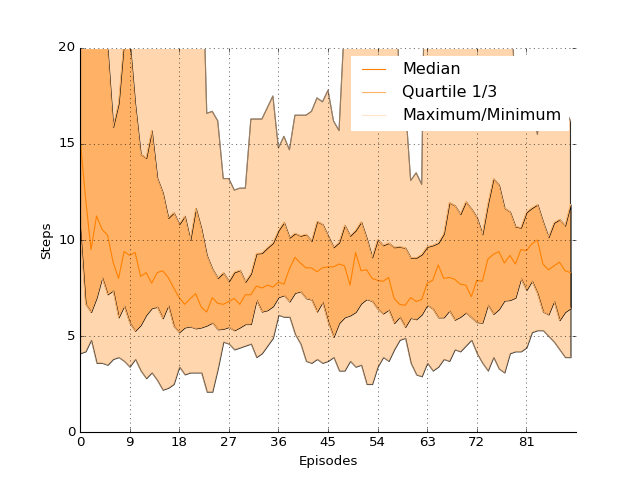

   Step  Min  1st Quartile  Median  3rd quartile  Max
0     0    2          5.00    11.0         26.00  108
1    11    1          3.75     5.5         11.00   38
2    22    1          4.75     9.0         15.50  188
3    33    1          2.00     6.5         10.00   34
4    44    1          4.00     6.0         16.25   33
5    55    1          2.00     5.0          6.50   15
6    66    1          2.75     3.0          7.75   15
7    77    1          3.00     5.5         10.25   33
8    88    1          1.75     2.5          7.25   20
9    99    1          2.00     4.5         10.00   85


<IPython.core.display.Javascript object>


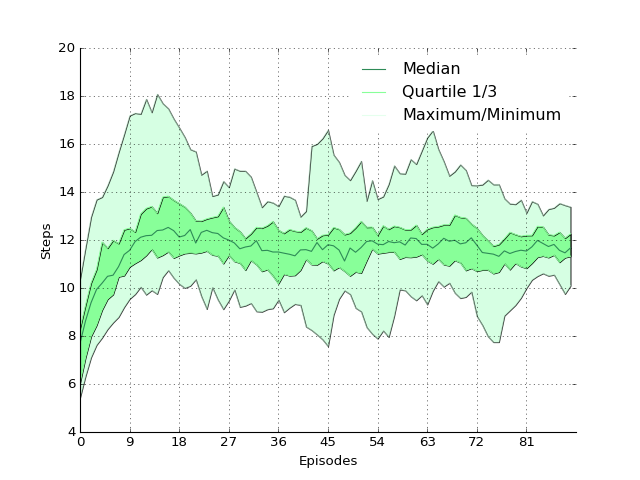

   Step  Min  1st Quartile  Median  3rd quartile    Max
0     0  0.0        0.0000   0.000        0.0000   0.00
1    11  7.5       10.1075  11.685       13.0700  16.25
2    22  8.0       10.9175  12.025       14.2850  17.54
3    33  8.0       10.4500  12.000       12.7825  17.43
4    44  0.0       10.3750  11.885       12.9450  19.50
5    55  0.0       10.3525  12.000       13.0625  19.50
6    66  8.0       10.2025  12.000       13.0000  18.00
7    77  8.0       10.3300  12.000       13.6250  16.20
8    88  8.0        8.0000  10.945       13.3000  18.00
9    99  0.0        9.7425  11.900       14.0625  16.00


In [13]:
plot_centiles(ts_nsm_epuck, 20, smooth_factor=10, filename="ts_nsm_epuck")

print_table(ts_nsm_epuck, 10)

plot_centiles(ps_nsm_epuck, smooth_factor=10, color="green", filename="ps_nsm_epuck")

print_table(ps_nsm_epuck, 10)

## Discounted Proximity

In [14]:
ts_dp_epuck = []
ts_dp_epuck.append([86,121,24,10,1,27,7,10,4,6,17,8,1,7,3,5,5,6,2,1,1,9,16,8,5,5,15,16,6,11,2,3,2,41,4,9,1,18,2,6,2,1,3,1,4,1,2,11,1,1,1,4,9,5,13,6,3,1,12,1,25,48,5,4,3,6,12,40,19,2,59,2,31,5,20,1,10,17,39,27,9,8,5,21,10,4,9,25,3,1,8,17,2,3,5,8,15,3,4,4])
ts_dp_epuck.append([32,2,1,23,6,1,11,33,1,10,7,6,1,15,31,6,11,2,7,12,1,3,37,4,18,35,5,1,3,12,5,4,5,12,6,23,16,7,35,10,1,4,8,21,3,7,2,25,14,13,11,13,3,8,4,4,16,4,4,3,2,23,12,5,5,5,9,4,3,11,1,19,3,4,6,4,7,2,28,4,2,12,6,6,7,4,4,9,5,1,15,38,1,1,1,11,4,3,4,4])
ts_dp_epuck.append([56,6,1,73,2,2,25,1,16,9,17,18,7,4,7,1,4,5,4,17,3,30,2,6,3,4,28,35,1,15,26,13,4,2,37,4,2,12,10,22,6,3,5,19,7,3,13,3,6,16,10,2,9,4,25,2,9,1,2,3,3,3,3,11,1,5,15,18,21,34,25,15,2,7,10,9,12,5,3,3,28,12,17,4,22,3,3,1,12,1,13,10,16,14,15,15,25,2,4,6])
ts_dp_epuck.append([26,119,6,17,38,23,2,30,10,12,17,8,22,9,9,15,2,13,19,4,7,10,1,1,40,1,4,5,7,5,14,1,14,9,8,5,14,2,1,7,13,9,19,2,7,4,4,1,2,29,1,7,14,16,4,5,6,7,5,6,5,16,10,11,6,12,1,1,29,4,6,7,2,4,2,2,8,9,9,5,3,13,17,4,4,11,19,1,2,6,3,1,1,8,5,9,22,8,1,6])
ts_dp_epuck.append([11,1,3,5,4,13,10,1,31,1,7,17,23,17,26,4,1,2,4,3,6,6,1,13,4,11,5,4,11,18,1,3,1,4,1,1,14,17,4,4,1,13,8,5,2,9,5,3,4,2,1,1,30,5,22,3,5,5,7,8,6,35,5,11,4,7,1,1,31,6,10,5,2,3,4,1,1,5,3,7,9,1,9,15,12,5,3,10,4,3,6,1,16,10,2,2,1,6,7,13])
ts_dp_epuck.append([2,8,6,1,8,56,7,1,6,9,51,19,11,2,15,18,15,26,6,10,3,2,1,6,8,5,24,8,9,28,10,7,11,2,1,16,2,7,29,1,6,19,16,2,24,2,9,5,4,2,2,3,26,1,37,10,4,1,5,4,7,6,11,2,6,2,1,2,51,2,20,3,13,1,3,4,9,17,6,3,2,22,16,7,2,21,6,12,1,15,1,32,3,15,15,1,3,8,4,4])
ts_dp_epuck.append([5,5,3,2,1,23,78,18,22,67,15,12,4,8,20,14,33,8,5,1,4,10,31,1,22,11,8,24,7,2,7,5,2,2,6,3,10,7,2,2,3,2,7,3,4,5,3,3,2,3,3,3,2,1,2,6,7,6,1,1,3,1,7,6,5,2,5,1,1,4,2,2,1,2,1,2,1,6,45,5,5,9,4,3,4,12,4,11,10,6,3,1,2,5,12,16,1,2,8,5])
ts_dp_epuck.append([22,1,2,4,4,6,7,4,4,2,3,3,5,5,2,2,2,5,7,11,8,7,1,2,6,3,11,3,15,58,1,12,48,10,6,4,9,5,4,7,1,14,8,5,10,5,8,2,4,17,1,1,1,8,10,3,5,5,1,9,2,1,1,6,2,2,2,14,1,33,19,14,47,10,3,4,6,8,3,9,8,5,22,5,4,9,1,8,4,7,17,7,3,5,1,9,1,11,1,1])
ts_dp_epuck.append([84,5,2,4,7,2,4,13,3,3,30,12,13,21,8,6,8,8,4,3,4,5,9,8,2,2,15,4,8,7,2,5,9,14,11,9,7,6,1,1,8,6,5,2,9,7,11,9,14,22,17,1,1,2,2,10,24,8,1,16,3,9,9,7,7,16,7,9,8,21,7,1,80,9,8,2,3,6,5,49,17,2,4,2,5,26,12,5,1,1,2,1,5,6,13,6,7,6,7,7])
ts_dp_epuck.append([24,5,7,4,16,3,1,2,6,4,7,1,3,3,1,2,5,4,3,9,1,6,45,4,4,13,5,1,16,3,1,2,22,5,3,1,2,3,12,10,7,12,7,3,9,4,1,6,4,3,6,3,1,1,7,2,1,6,3,2,5,3,33,17,3,9,16,9,6,11,6,3,2,4,4,1,4,6,1,3,1,1,1,5,29,26,2,4,6,11,32,1,17,2,13,41,49,5,2,1])
ts_dp_epuck.append([31,1,8,5,5,5,3,17,6,7,9,7,9,3,5,4,10,13,9,9,12,6,15,1,15,31,13,8,2,8,4,5,8,5,11,2,9,1,1,4,11,9,8,2,5,14,5,5,7,24,8,1,9,2,9,1,1,6,19,16,20,13,15,7,6,7,9,16,5,34,5,3,3,11,6,12,1,1,4,1,8,4,5,6,8,2,2,14,10,3,7,8,1,7,1,8,2,7,1,6])
ts_dp_epuck.append([121,18,15,3,4,20,1,1,6,6,6,6,10,7,9,1,9,31,8,3,4,7,11,8,10,24,6,4,29,2,10,1,5,18,1,5,18,2,10,2,4,16,3,37,9,17,6,10,13,6,1,8,2,2,2,8,4,2,16,4,4,12,7,5,3,12,6,2,2,3,6,4,2,1,5,6,4,1,11,10,2,3,30,5,7,8,1,13,1,5,69,6,13,3,6,1,1,4,2,2])
ts_dp_epuck.append([38,3,18,4,2,3,19,3,10,76,7,3,40,7,7,14,17,1,10,5,13,8,3,3,13,1,6,6,1,40,9,8,1,10,8,14,8,6,1,1,12,4,14,3,1,3,15,1,11,11,1,7,15,7,2,12,13,4,2,2,15,29,4,3,8,3,22,42,9,6,18,10,1,4,11,1,18,16,3,5,2,14,2,2,7,1,4,31,6,4,9,5,3,8,1,1,2,3,6,18])
ts_dp_epuck.append([55,299,2,67,4,1,1,62,7,7,1,1,11,1,1,3,9,1,12,10,4,17,9,3,2,8,1,4,1,9,5,11,21,5,2,9,2,1,1,6,15,2,1,2,4,9,2,15,1,2,44,8,6,1,1,2,13,4,5,17,5,1,17,9,2,3,5,2,12,1,2,13,2,1,5,5,5,11,4,16,1,19,4,6,13,10,18,4,1,23,1,3,7,6,3,4,18,11,7,1])
ts_dp_epuck.append([21,3,1,3,1,12,16,1,9,3,13,3,9,7,1,7,1,22,13,16,7,14,10,2,6,5,7,7,3,2,11,10,4,35,11,18,8,9,5,1,4,8,4,5,18,5,7,1,1,5,3,6,5,5,2,8,23,7,9,16,45,15,6,1,10,11,5,11,7,2,8,1,1,2,19,6,2,5,6,3,12,25,1,3,6,2,7,7,3,2,2,7,9,1,15,1,5,10,2,17])
ts_dp_epuck.append([27,28,97,8,1,52,10,5,3,12,8,3,10,5,7,3,12,4,1,17,10,7,13,3,2,8,7,4,3,1,2,33,17,1,8,57,1,4,3,2,26,138,7,5,30,4,1,4,78,13,33,14,6,4,2,10,18,9,6,16,4,22,46,4,76,5,7,9,15,103,50,1,18,5,11,1,9,1,18,17,18,12,2,8,18,5,11,5,8,10,1,21,8,4,2,11,3,4,11,19])
ts_dp_epuck.append([6,22,1,1,40,2,4,3,57,3,5,1,6,3,2,7,1,1,17,2,17,4,4,7,8,1,26,4,4,11,1,1,2,5,12,12,5,1,21,3,3,50,3,10,7,3,11,8,11,5,2,1,6,3,4,3,23,3,19,7,5,3,6,4,18,7,1,4,10,4,5,2,3,10,2,3,1,6,4,2,7,117,2,5,37,11,6,18,6,2,28,3,1,11,3,29,96,14,17,1])
ts_dp_epuck.append([40,10,53,14,3,1,20,10,15,10,19,12,1,6,72,2,3,1,1,5,1,4,11,20,5,4,5,14,1,6,5,12,6,8,9,14,7,22,4,3,1,2,4,12,1,5,14,14,8,21,3,20,8,6,4,8,1,4,1,3,9,5,11,15,2,4,5,52,7,5,3,15,12,3,1,15,13,2,2,3,6,5,3,19,7,9,6,1,5,10,6,7,9,1,1,8,16,8,6,4])
ts_dp_epuck.append([13,6,6,6,32,3,4,16,6,1,2,3,7,5,1,24,3,12,13,16,11,1,7,4,6,17,14,21,16,2,11,11,22,1,8,18,4,5,33,24,26,3,50,2,16,6,5,17,17,5,5,14,1,11,1,1,9,15,6,1,3,4,2,5,23,25,3,5,2,4,5,5,1,19,1,9,24,7,1,3,1,3,5,12,1,4,2,3,14,1,9,8,9,1,16,12,1,9,1,8])
ts_dp_epuck.append([1,2,8,1,3,6,8,13,37,37,7,3,4,4,12,7,1,1,14,10,9,9,7,128,5,24,10,6,18,1,15,5,2,3,9,12,49,4,10,6,14,4,1,5,8,6,10,7,1,3,7,6,16,6,1,23,16,25,31,4,4,14,3,11,3,1,2,7,1,9,18,2,3,31,2,10,3,8,4,2,15,3,1,1,5,1,34,11,11,4,1,3,11,1,119,12,4,8,10,9])

ps_dp_epuck = []
ps_dp_epuck.append([0.00,11.38,4.74,11.71,0.00,7.31,9.60,14.12,14.16,13.11,18.08,14.31,8.00,16.24,13.70,13.91,13.84,11.75,9.43,8.00,8.00,14.80,15.02,16.91,11.25,11.81,16.06,16.84,13.58,10.04,11.80,10.85,11.80,12.46,14.51,13.26,0.00,13.02,11.80,13.77,11.80,8.00,10.80,8.00,12.58,8.00,8.00,11.93,8.00,8.00,8.00,11.97,10.66,10.30,12.90,12.30,10.50,8.00,14.20,8.00,13.75,16.67,11.68,13.05,13.32,10.85,13.85,15.30,18.68,10.38,20.06,8.95,22.95,19.00,23.96,8.00,17.84,20.83,18.64,25.96,17.62,22.87,15.31,18.59,22.36,15.46,14.57,21.91,15.47,0.00,16.56,19.96,15.60,12.67,21.07,14.80,15.96,15.17,16.95,12.35])
ps_dp_epuck.append([0.00,2.50,4.00,5.88,10.59,8.00,10.74,12.70,8.00,11.82,14.55,13.71,8.00,17.46,17.06,13.69,12.65,9.90,15.18,18.11,0.00,13.95,14.57,15.48,15.93,19.60,12.05,8.00,12.25,12.91,17.27,12.43,13.57,13.84,14.48,21.11,15.70,16.44,15.71,15.22,0.00,12.42,15.54,16.77,14.55,11.02,11.80,14.66,16.82,18.52,16.15,17.60,13.65,17.04,12.63,12.20,15.11,14.53,12.92,10.85,9.90,14.29,16.11,15.62,12.73,16.54,11.07,11.07,11.78,15.02,8.00,14.91,12.27,13.66,12.15,14.51,11.93,10.85,15.89,14.07,15.60,14.31,16.27,11.31,15.29,15.53,10.78,17.82,12.39,8.00,11.58,14.78,0.00,8.00,0.00,14.49,16.09,12.73,16.04,11.37])
ps_dp_epuck.append([0.00,3.33,3.00,6.44,9.43,9.90,9.48,8.00,13.31,10.50,17.35,19.23,13.21,13.19,13.49,8.00,10.78,11.10,13.56,16.67,11.80,17.61,11.80,16.03,11.17,17.98,20.52,18.83,8.00,18.44,19.12,14.03,14.22,15.60,18.14,12.89,14.65,16.58,17.22,13.85,12.67,12.34,18.56,20.20,15.52,13.67,14.65,11.15,14.83,19.09,13.84,0.00,20.65,20.29,18.71,8.95,17.86,8.00,11.80,9.88,13.62,14.24,15.47,17.28,8.00,14.21,12.24,10.19,15.53,21.36,19.33,19.15,15.60,16.08,17.00,12.62,14.37,15.66,10.85,16.95,17.17,19.73,19.83,11.15,15.13,11.15,12.66,8.00,18.92,0.00,16.78,13.54,14.91,14.92,18.07,16.51,18.27,11.80,14.87,13.81])
ps_dp_epuck.append([0.00,8.50,7.15,15.96,15.90,16.22,8.00,18.99,16.91,10.34,13.52,15.22,27.44,16.32,20.99,16.79,8.00,17.39,21.12,13.02,15.70,15.46,0.00,8.00,18.03,8.00,14.22,14.65,15.79,18.68,19.99,8.00,14.92,13.74,14.52,9.14,12.14,15.60,8.00,15.24,12.69,15.93,17.89,15.60,16.70,13.41,17.17,8.00,8.00,11.89,8.00,15.08,15.17,18.07,13.61,11.23,12.42,11.66,13.77,15.53,16.17,18.45,16.07,8.74,13.40,19.51,8.00,8.00,23.81,15.01,15.06,11.16,11.80,11.74,0.00,11.32,11.51,18.27,13.27,15.34,12.40,16.06,17.29,14.22,14.26,16.68,20.03,8.00,15.60,14.59,13.30,8.00,8.00,13.45,15.62,17.15,16.04,14.10,0.00,12.36])
ps_dp_epuck.append([0.00,3.00,2.50,4.69,7.33,5.32,6.99,8.00,11.96,8.00,12.06,15.70,17.87,18.08,15.92,14.91,8.00,15.60,14.49,0.00,14.65,17.09,8.00,17.89,13.64,17.28,15.08,14.52,16.73,17.30,8.00,18.31,8.00,13.07,8.00,8.00,10.58,17.05,12.35,15.17,8.00,10.42,13.24,12.31,11.32,16.89,12.99,12.73,15.65,11.80,8.00,8.00,12.94,12.04,17.08,18.76,15.58,9.85,16.86,17.25,19.08,20.54,11.68,15.96,11.74,16.28,8.00,0.00,9.15,16.02,15.85,14.07,11.80,14.27,15.41,8.00,8.00,13.85,8.00,10.19,16.00,8.00,12.46,15.19,12.05,15.38,10.38,16.39,12.89,11.78,14.00,8.00,9.12,8.41,8.95,11.80,8.00,12.54,11.50,11.03])
ps_dp_epuck.append([0.00,1.19,7.89,8.00,8.02,5.67,12.01,8.00,12.65,14.83,11.41,16.32,17.24,11.80,11.88,15.98,13.80,20.37,19.74,18.83,11.66,11.80,0.00,13.63,14.69,14.11,16.40,16.12,15.31,23.11,19.49,14.91,18.10,11.80,8.00,21.64,0.00,15.71,20.81,8.00,14.60,11.40,15.50,11.80,19.73,11.80,17.83,9.79,12.44,8.00,11.32,12.25,19.70,0.00,18.76,14.46,13.94,8.00,13.98,13.62,13.49,14.51,17.89,15.60,15.38,10.38,8.00,10.38,17.37,11.32,20.42,10.85,19.46,8.00,8.47,13.78,12.81,16.42,11.64,13.02,11.80,19.21,19.96,17.31,0.00,22.21,12.64,8.90,8.00,18.89,8.00,12.44,11.80,17.25,19.10,8.00,16.05,16.96,16.38,12.07])
ps_dp_epuck.append([0.00,2.93,3.97,6.92,8.00,5.91,6.73,7.30,15.05,40.33,19.74,13.82,11.94,13.34,26.07,20.01,19.02,18.84,14.98,8.00,14.22,16.35,25.29,8.00,22.12,19.54,16.26,20.10,13.68,11.80,17.58,16.93,11.80,8.00,15.02,15.47,16.83,13.79,11.80,14.65,11.15,11.80,14.31,14.55,11.15,13.61,11.71,10.83,8.00,12.39,11.45,10.20,13.70,8.00,11.80,10.99,12.59,12.94,8.00,8.00,10.82,8.00,12.16,11.79,14.36,11.80,11.20,8.00,8.00,11.96,10.85,11.80,8.00,9.88,8.00,15.60,8.00,12.12,5.38,9.48,12.63,11.09,10.66,11.80,12.20,10.40,14.76,9.46,11.63,11.00,10.22,8.00,11.80,13.68,17.31,15.34,8.00,15.60,13.69,16.77])
ps_dp_epuck.append([0.00,0.00,4.97,2.33,7.85,14.38,13.39,14.48,9.01,11.80,9.45,20.11,9.91,10.44,11.32,11.80,11.80,9.78,12.67,11.70,11.13,13.49,8.00,11.32,13.05,13.02,12.55,12.05,11.50,11.97,8.00,14.17,7.91,15.23,14.97,12.32,14.53,13.94,9.88,16.14,8.00,15.52,13.03,14.59,15.89,11.57,17.94,11.80,11.72,12.13,8.00,8.00,0.00,13.95,15.30,11.25,14.28,16.89,8.00,17.47,11.80,8.00,8.00,6.49,8.00,9.43,15.60,16.45,8.00,13.82,13.97,14.93,12.08,14.04,13.15,11.52,13.33,17.31,13.70,15.79,17.07,10.21,13.62,12.95,13.62,16.70,8.00,13.45,13.89,12.27,18.78,18.89,12.72,12.87,8.00,18.88,8.00,15.86,8.00,8.00])
ps_dp_epuck.append([0.00,10.53,8.00,6.16,11.56,6.45,6.28,10.82,11.09,8.87,5.64,10.98,14.22,14.06,16.21,14.73,16.05,17.47,15.31,14.13,14.19,13.27,18.85,13.21,11.80,11.80,19.77,12.82,17.31,14.85,11.32,13.15,11.53,16.67,16.24,17.98,13.18,16.54,0.00,0.00,14.42,14.10,16.48,15.60,13.59,16.02,16.45,14.95,18.29,15.66,10.22,8.00,8.00,11.80,11.80,16.60,18.06,17.70,8.00,15.39,13.97,16.13,13.23,13.38,15.29,17.08,15.33,13.68,17.10,13.78,16.99,8.00,16.06,19.01,17.26,10.85,11.80,10.65,13.89,13.55,17.28,11.80,14.53,10.38,18.58,19.13,19.25,14.24,8.00,8.00,15.60,8.00,17.89,11.78,15.82,15.68,12.48,12.29,15.98,16.23])
ps_dp_epuck.append([0.00,3.74,5.40,9.90,8.65,9.33,8.00,10.38,11.01,10.71,9.82,8.00,11.80,9.83,8.00,9.90,12.85,12.88,12.73,12.25,8.00,12.23,9.22,11.30,12.35,13.77,13.00,0.00,12.05,13.97,8.00,12.75,10.32,11.13,10.85,8.00,11.80,10.50,11.41,14.41,15.12,16.49,13.52,11.25,9.89,14.26,8.00,12.01,13.82,10.78,10.82,10.38,8.00,8.00,12.27,8.95,8.00,14.22,11.12,10.85,8.79,11.75,10.05,11.41,11.23,12.59,13.71,15.15,14.26,16.36,12.63,11.15,11.80,17.26,10.23,8.00,11.15,12.11,8.00,8.00,8.00,8.00,0.00,12.64,9.62,18.97,11.80,12.97,9.70,17.58,18.29,8.00,12.93,11.80,15.41,14.49,17.60,14.69,11.80,8.00])
ps_dp_epuck.append([0.00,3.00,7.20,8.95,9.53,9.02,9.88,8.02,11.90,6.86,8.64,13.75,15.26,10.20,15.20,12.81,18.31,14.76,18.46,14.64,14.98,14.14,15.88,8.00,13.49,12.93,17.44,19.63,11.80,16.30,11.63,16.12,13.57,12.88,16.00,11.80,18.04,8.00,0.00,13.13,17.23,14.51,14.28,11.80,13.06,14.74,11.05,13.68,15.34,14.63,15.00,8.00,18.07,8.00,9.58,8.00,0.00,11.98,15.67,19.06,14.91,16.80,19.59,14.70,12.26,14.57,16.56,14.39,16.93,10.58,13.27,12.23,12.39,16.03,18.16,17.43,8.00,8.00,11.75,8.00,13.66,13.11,14.84,13.27,15.69,11.32,11.80,12.93,15.67,13.05,7.63,14.74,8.00,9.04,8.00,12.13,11.80,12.26,8.00,11.98])
ps_dp_epuck.append([0.00,3.05,11.32,8.87,8.35,14.45,8.00,8.00,10.54,10.30,12.44,12.69,15.10,15.04,13.61,8.00,13.27,19.40,15.91,14.24,14.10,17.50,15.10,16.25,16.82,17.76,13.10,13.49,19.64,8.95,15.40,8.00,13.80,18.19,0.00,14.08,16.56,15.60,15.97,11.80,11.80,18.12,14.27,19.40,17.10,18.00,12.79,16.73,18.79,15.01,8.00,18.74,11.80,11.80,10.85,18.57,12.89,11.80,15.14,13.18,13.82,17.96,16.55,13.81,12.27,16.73,17.07,11.80,11.80,13.95,10.02,11.95,11.80,8.00,12.84,11.13,13.80,8.00,14.54,9.44,0.00,14.65,13.85,15.14,8.61,11.21,8.00,11.33,8.00,15.78,17.88,14.23,13.55,15.47,16.90,0.00,8.00,13.61,15.60,11.80])
ps_dp_epuck.append([0.00,4.98,7.49,11.12,9.90,12.20,13.53,10.19,15.52,4.92,16.47,10.85,11.59,14.12,14.25,16.31,15.64,8.00,18.72,13.69,17.00,14.66,12.34,11.23,14.04,8.00,13.22,12.66,8.00,18.15,11.48,11.65,8.00,11.62,10.99,19.01,13.53,13.85,8.00,8.00,17.99,14.22,15.09,12.05,8.00,8.00,16.11,0.00,12.35,18.06,8.00,16.45,16.17,17.31,10.38,16.45,17.87,15.65,8.00,11.80,19.43,23.15,10.53,11.15,12.92,13.15,19.82,18.01,14.62,15.38,22.04,17.93,8.00,15.94,17.98,8.00,23.96,18.62,14.57,10.55,8.00,13.09,10.38,10.85,14.40,8.00,13.83,16.14,14.50,16.12,15.34,14.03,12.07,16.16,0.00,8.00,14.65,13.02,14.44,13.21])
ps_dp_epuck.append([0.00,6.78,10.85,15.64,8.85,8.00,0.00,13.99,14.55,16.59,0.00,8.00,13.87,8.00,8.00,12.75,15.19,8.00,16.69,16.26,12.88,10.60,13.67,9.25,0.00,14.30,8.00,12.34,8.00,11.67,12.66,12.70,19.68,15.88,14.65,14.26,11.80,8.00,0.00,17.20,18.40,10.85,8.00,10.85,11.28,12.69,11.80,19.09,8.00,12.75,12.21,11.85,18.88,8.00,8.00,11.80,15.81,13.24,17.31,14.12,12.85,8.00,16.41,17.80,11.80,13.20,8.00,11.80,13.77,8.00,15.60,18.17,11.80,8.00,13.49,15.77,12.82,11.80,13.36,14.97,8.00,14.88,13.85,15.59,9.11,12.65,15.34,14.87,8.00,16.58,8.00,11.80,12.58,12.93,16.50,17.63,16.87,15.48,13.36,8.00])
ps_dp_epuck.append([0.00,8.93,8.00,6.62,8.00,9.16,12.44,8.00,12.38,9.47,13.77,11.65,18.28,9.21,8.00,13.31,8.00,12.66,11.23,17.43,14.40,18.82,10.49,15.60,13.61,16.53,16.22,17.39,10.85,11.80,11.26,14.32,9.90,11.91,15.71,15.13,15.87,12.77,11.60,8.00,11.86,16.57,16.81,13.27,15.40,10.60,11.31,8.00,0.00,11.76,9.90,13.59,11.09,12.90,11.80,15.09,11.13,13.83,15.02,23.85,14.42,13.55,13.48,8.00,18.44,10.23,13.00,12.37,14.41,9.90,16.27,8.00,8.00,11.80,16.70,14.40,13.70,11.30,14.31,16.50,14.94,18.77,0.00,11.47,12.94,11.80,13.39,15.88,13.03,11.80,10.38,14.97,13.55,8.00,17.13,8.00,12.38,14.89,11.80,15.07])
ps_dp_epuck.append([0.00,10.93,13.66,11.74,8.00,18.15,14.75,10.50,10.78,12.40,15.14,12.99,12.24,13.17,17.60,13.35,15.36,15.97,8.00,20.56,16.55,17.24,16.73,14.55,0.00,13.44,14.15,14.87,11.80,8.00,11.80,18.51,17.92,8.00,15.11,13.39,8.00,18.22,14.60,11.80,17.84,9.95,16.41,13.80,16.77,14.31,8.00,16.17,17.63,16.17,21.24,17.44,17.74,16.63,9.43,15.60,16.96,17.73,19.06,17.99,14.65,18.77,20.67,18.31,20.30,14.82,14.98,18.28,20.42,20.17,22.01,8.00,22.70,16.99,18.26,8.00,16.60,8.00,19.11,20.94,20.73,17.08,12.75,14.04,14.94,12.15,19.40,13.38,15.17,15.38,0.00,16.97,14.20,15.19,11.80,16.98,15.98,13.08,20.49,15.18])
ps_dp_epuck.append([0.00,1.56,2.00,3.00,7.76,5.00,4.70,8.47,7.17,11.09,10.53,8.00,9.27,9.30,9.43,8.81,8.00,8.00,14.23,8.00,15.66,12.19,14.46,10.14,13.41,8.00,10.71,12.67,14.52,13.45,8.00,8.00,11.80,10.71,13.97,15.95,12.11,8.00,12.70,11.13,12.27,13.07,11.15,16.19,19.35,16.50,13.61,15.45,15.90,11.60,8.47,8.00,12.87,8.95,12.34,12.70,18.27,14.27,18.08,15.74,11.25,12.10,13.21,13.11,20.28,17.14,0.00,11.42,15.19,12.62,13.14,11.80,12.42,17.90,11.80,10.38,8.00,14.97,11.77,11.80,20.47,13.67,11.80,11.30,12.46,15.16,14.55,18.95,11.90,8.00,18.04,13.11,8.00,17.84,13.95,24.79,15.53,13.87,17.21,8.00])
ps_dp_epuck.append([0.00,3.93,7.36,13.19,9.90,8.00,13.76,11.18,16.83,16.09,17.27,14.43,8.00,14.70,9.67,8.95,17.40,8.00,8.00,11.96,8.00,13.15,16.82,16.68,17.38,13.62,16.93,18.39,8.00,11.32,13.17,14.86,13.90,14.66,16.10,14.37,19.81,17.70,13.55,15.17,8.00,11.80,11.69,18.06,8.00,13.97,19.84,15.12,9.33,16.78,11.80,18.44,16.93,17.24,14.35,15.08,8.00,11.74,8.00,10.53,15.01,11.80,18.76,13.57,0.00,13.97,13.34,16.62,14.54,12.44,8.95,13.59,16.23,11.21,8.00,16.79,18.54,15.60,11.80,11.32,14.26,15.53,10.53,11.21,17.57,12.89,13.08,8.00,15.18,12.07,15.46,15.34,18.72,8.00,8.00,12.63,11.52,15.68,14.53,12.01])
ps_dp_epuck.append([0.00,8.00,4.52,6.03,7.76,8.62,9.23,7.48,12.77,8.00,9.43,10.35,11.82,12.03,8.00,15.31,13.29,15.57,14.50,18.05,18.41,8.00,16.63,12.36,14.42,13.52,16.32,21.84,13.56,8.00,19.04,13.80,23.06,8.00,17.93,17.31,16.36,15.23,19.87,18.80,19.66,8.93,17.74,11.80,19.23,16.33,17.38,22.06,18.36,9.88,17.46,16.78,0.00,15.45,8.00,8.00,16.14,18.85,14.32,8.00,13.97,14.57,10.38,14.32,13.09,15.28,10.79,12.49,10.85,13.84,14.49,15.67,0.00,15.00,8.00,10.61,18.89,16.82,8.00,12.18,8.00,12.65,18.13,12.12,8.00,8.45,11.80,13.97,10.46,8.00,12.85,9.98,16.14,8.00,10.64,17.17,0.00,15.92,0.00,10.65])
ps_dp_epuck.append([0.00,0.00,1.50,5.00,6.30,5.43,5.89,6.07,11.44,15.68,13.17,8.90,13.31,13.11,13.69,11.16,8.00,8.00,18.74,17.28,17.09,13.47,15.44,9.47,17.29,18.21,14.02,16.23,15.83,8.00,16.20,17.61,8.00,12.25,11.53,17.59,14.13,13.63,16.32,15.48,17.35,13.50,8.00,18.49,16.64,14.60,13.29,14.70,8.00,13.32,11.15,15.51,12.14,13.71,8.00,17.27,14.26,13.18,18.54,14.72,14.06,13.40,12.25,12.41,8.00,8.00,11.80,13.18,8.00,15.45,18.50,11.80,12.39,19.51,11.80,14.77,13.65,17.16,11.74,8.00,16.93,11.32,8.00,8.00,12.38,8.00,11.26,13.10,17.32,12.68,8.00,11.66,14.57,8.00,15.31,18.32,11.36,12.82,12.10,12.93])


<IPython.core.display.Javascript object>


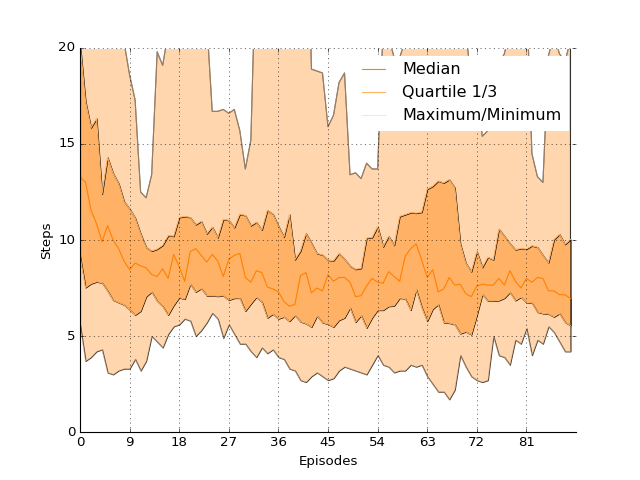

   Step  Min  1st Quartile  Median  3rd quartile  Max
0     0    1         12.50    26.5         43.75  121
1    11    1          3.00     6.0         12.00   19
2    22    1          2.75     9.0         13.50   45
3    33    1          2.75     5.0         10.50   41
4    44    1          4.00     7.0          9.25   30
5    55    1          2.75     5.5          8.50   23
6    66    1          2.00     5.0          9.00   22
7    77    1          4.25     6.0          8.25   17
8    88    1          2.75     5.0          8.50   14
9    99    1          3.50     5.5          8.25   19


<IPython.core.display.Javascript object>


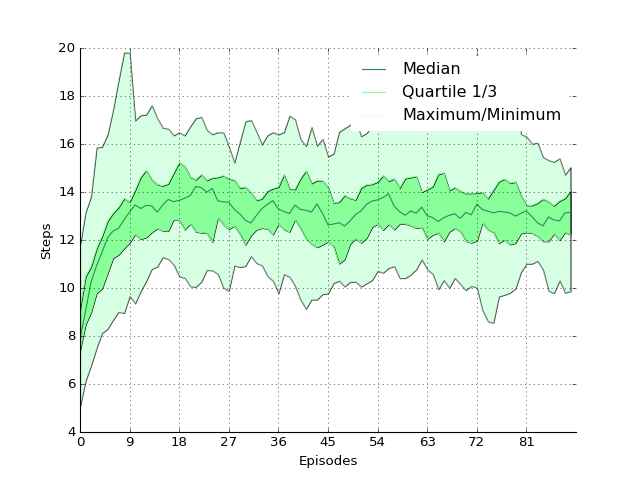

   Step  Min  1st Quartile  Median  3rd quartile    Max
0     0  0.0        0.0000   0.000        0.0000   0.00
1    11  8.0       10.7250  13.350       14.6275  20.11
2    22  0.0       10.1725  14.515       16.0675  25.29
3    33  8.0       11.4975  12.670       14.8025  18.19
4    44  8.0       11.3100  14.975       16.7175  19.73
5    55  8.0       11.1700  12.500       15.8125  18.76
6    66  0.0       10.0925  12.620       15.0675  19.82
7    77  8.0       11.1875  14.410       16.9050  20.83
8    88  8.0       10.2700  12.960       15.2525  18.92
9    99  8.0       10.9350  12.040       13.3600  16.77


In [15]:
plot_centiles(ts_dp_epuck, 20, smooth_factor=10, filename="ts_dp_epuck")

print_table(ts_dp_epuck, 10)

plot_centiles(ps_dp_epuck, smooth_factor=10, color="green", filename="ps_dp_epuck")

print_table(ps_dp_epuck, 10)

## Laplace Proximity

In [16]:
ts_lp_epuck = []
ts_lp_epuck.append([37,9,17,26,2,1,2,2,6,9,5,2,3,1,5,7,7,10,2,4,1,6,15,8,1,9,22,4,1,9,6,2,7,1,6,5,8,3,4,3,1,3,3,8,1,3,6,64,1,6,1,2,6,3,16,9,1,8,1,8,2,4,1,3,1,3,5,1,23,11,2,8,4,15,9,2,9,1,2,10,9,20,3,2,12,10,5,9,16,1,2,6,5,9,2,8,6,2,6,1])
ts_lp_epuck.append([41,4,6,2,22,3,4,6,4,6,1,8,22,8,6,2,2,7,5,4,1,35,10,1,12,16,20,4,16,2,1,4,2,34,1,6,8,19,3,17,5,33,1,16,13,1,11,8,16,6,14,1,30,11,1,8,7,1,13,16,3,15,29,7,2,18,18,6,6,46,3,10,12,6,1,8,11,1,10,1,4,7,3,7,7,6,13,1,1,11,6,15,1,10,6,50,4,9,3,2])
ts_lp_epuck.append([176,1,4,21,12,14,4,1,52,17,2,5,4,15,1,3,7,23,3,3,41,4,12,8,1,1,10,5,26,3,4,6,40,7,8,1,11,8,12,2,1,21,4,15,11,2,2,16,4,14,16,8,1,1,19,3,3,2,16,6,6,24,27,5,13,46,1,4,15,6,2,5,53,9,14,15,7,7,3,5,3,1,33,62,7,4,1,16,15,2,5,4,3,12,3,2,22,2,2,28])
ts_lp_epuck.append([26,154,5,16,8,5,1,6,1,4,1,1,16,4,4,1,9,1,1,6,2,6,6,14,1,7,1,8,2,2,3,2,18,3,1,22,3,14,2,3,1,5,4,5,1,8,3,2,6,6,37,17,4,1,4,9,3,1,1,5,5,5,3,3,15,15,5,33,5,1,1,28,7,9,10,7,2,4,4,4,2,12,6,8,2,18,11,10,5,5,2,3,15,6,12,6,6,4,2,21])
ts_lp_epuck.append([2,11,10,58,36,19,2,5,127,1,6,2,8,8,8,16,4,8,1,2,8,4,7,4,12,1,3,91,12,2,1,2,7,2,34,9,2,4,2,18,1,1,3,4,2,9,1,7,9,3,2,32,8,7,3,6,3,1,5,48,4,1,8,10,34,31,2,46,1,2,2,12,5,5,11,11,9,5,13,1,29,11,8,14,50,2,2,9,2,4,3,7,4,3,22,4,2,25,7,2])
ts_lp_epuck.append([23,1,24,2,7,2,2,10,4,15,29,5,8,8,8,1,1,1,2,4,4,8,12,9,2,17,3,2,1,4,10,6,19,10,9,12,3,1,2,4,2,2,18,4,5,1,1,5,3,11,2,25,1,1,5,19,2,20,5,7,22,8,13,1,14,24,6,4,1,9,17,8,1,13,2,2,34,2,1,5,12,1,7,7,1,21,14,8,5,3,2,14,5,10,6,12,11,2,8,7])
ts_lp_epuck.append([13,11,54,11,8,9,6,8,2,7,1,11,9,5,11,11,3,7,3,5,4,6,6,5,3,9,1,9,1,4,6,15,27,4,5,2,1,13,2,6,1,9,12,5,6,8,10,3,7,13,14,19,4,29,12,1,12,12,34,2,1,5,5,3,1,9,1,1,16,1,5,10,19,3,29,4,4,7,22,1,5,8,1,3,7,1,23,13,4,14,1,1,2,5,5,1,5,11,8,2])
ts_lp_epuck.append([4,9,81,3,19,22,9,2,11,28,9,2,6,24,4,6,8,4,2,2,17,8,1,2,4,6,5,18,9,4,16,4,1,5,5,7,1,2,3,12,3,8,18,8,1,14,3,6,2,25,4,5,21,18,8,23,1,30,11,8,28,18,8,7,17,2,12,4,7,21,37,3,22,1,23,4,7,8,3,6,2,17,17,54,2,9,19,1,7,14,20,9,2,9,3,13,4,10,1,12])
ts_lp_epuck.append([52,103,2,4,23,7,1,6,4,1,18,3,2,9,12,11,3,2,4,1,5,19,4,5,13,8,8,8,1,5,1,26,1,5,14,3,4,3,12,2,2,3,12,3,3,31,8,11,5,4,1,1,6,4,10,5,5,11,3,4,8,3,6,2,9,2,15,1,7,10,10,9,9,16,2,16,7,23,7,5,6,12,24,2,9,1,8,19,11,21,11,3,3,23,3,7,3,2,1,7])
ts_lp_epuck.append([29,1,1,4,12,1,18,5,27,1,22,1,12,6,11,5,10,6,10,7,4,4,9,2,8,1,7,3,33,3,6,6,15,8,5,8,21,1,1,2,4,10,28,14,4,1,10,3,7,13,1,2,3,8,5,1,1,6,40,10,7,1,1,5,5,1,15,10,24,2,2,2,34,5,2,6,4,2,1,5,6,4,2,18,5,31,1,6,35,6,21,20,2,1,1,3,15,2,6,1])
ts_lp_epuck.append([67,4,11,15,1,6,3,9,2,11,6,3,18,6,2,15,8,2,3,5,11,3,10,7,12,5,3,8,10,23,3,32,12,2,16,1,4,28,1,3,5,6,11,2,3,2,6,4,1,7,17,7,15,9,6,2,2,1,1,2,1,2,23,16,4,2,4,6,9,4,2,13,14,11,3,10,3,3,23,21,13,1,4,26,5,28,2,32,1,15,4,3,18,18,4,9,2,3,6,7])
ts_lp_epuck.append([66,2,46,78,1,1,10,7,39,11,17,1,2,1,2,4,2,3,16,16,21,10,15,19,1,51,1,4,31,4,1,2,31,9,72,14,2,17,1,8,1,7,6,20,4,6,10,2,56,2,6,3,6,8,16,1,4,4,3,4,12,1,3,9,13,1,5,2,5,12,20,2,1,14,2,7,1,5,28,5,5,5,21,3,9,4,7,2,15,16,6,15,6,3,1,7,1,5,6,1])
ts_lp_epuck.append([16,29,125,8,9,14,2,8,2,2,3,3,3,2,9,3,31,11,1,9,4,2,1,47,1,2,8,9,1,6,11,16,18,10,4,11,1,13,1,13,2,3,3,7,21,1,1,2,9,9,9,15,17,2,6,17,15,19,5,3,19,8,12,1,7,11,7,10,6,7,4,17,1,3,3,4,5,1,42,1,22,4,16,23,13,10,4,1,9,21,13,1,15,1,1,4,9,1,9,1])
ts_lp_epuck.append([5,1,22,24,9,7,4,20,3,39,5,4,111,10,12,9,4,2,23,11,6,3,5,1,31,4,5,3,1,20,5,5,1,7,4,1,16,14,4,4,1,9,2,1,5,5,2,1,2,36,9,2,10,8,5,3,3,10,1,18,1,2,21,34,5,7,6,1,1,7,5,2,14,8,9,2,5,7,7,4,3,6,5,10,8,8,11,12,2,1,1,4,3,4,1,12,21,18,27,38])
ts_lp_epuck.append([33,2,44,99,8,12,1,1,1,2,175,16,6,1,10,1,2,9,5,1,3,2,1,9,1,4,2,3,5,5,5,20,15,15,10,33,1,17,9,6,4,2,4,1,3,1,3,3,7,6,11,4,11,11,10,6,2,21,23,23,18,1,8,12,9,19,1,5,8,7,1,2,2,8,4,11,3,12,7,10,8,11,18,4,6,5,1,8,17,15,6,6,10,1,6,2,7,2,6,1])
ts_lp_epuck.append([13,1,2,4,2,1,6,1,4,6,1,6,7,1,1,3,25,14,2,11,11,4,6,1,6,1,5,3,7,9,8,3,3,7,4,7,10,3,14,2,1,18,5,2,4,7,1,13,5,3,6,7,7,8,5,6,3,2,6,1,1,10,6,14,5,1,6,2,1,11,1,3,4,9,16,1,1,11,40,2,8,4,1,4,4,3,3,3,9,5,14,3,1,9,2,6,4,1,1,8])
ts_lp_epuck.append([88,1,72,14,26,1,1,7,1,16,4,7,7,7,3,2,23,12,16,1,3,1,1,6,1,9,18,2,4,5,3,3,8,2,11,6,13,8,1,5,2,17,16,5,4,13,15,1,1,1,10,6,7,1,5,3,9,27,3,13,5,13,5,23,3,2,5,6,4,4,2,10,11,22,1,9,14,3,2,1,3,4,7,1,30,5,11,11,10,5,4,7,15,4,1,28,3,120,3,14])
ts_lp_epuck.append([3,48,11,23,14,2,5,3,1,9,7,5,6,3,3,2,6,10,2,4,5,13,9,5,4,13,25,2,4,15,1,6,12,1,8,2,8,8,2,14,8,2,3,1,23,12,8,18,1,13,9,7,1,1,1,17,7,2,13,1,2,6,3,22,6,7,17,16,3,1,4,2,30,3,3,2,15,1,3,15,10,6,11,3,7,1,10,2,4,2,3,19,3,39,12,7,5,2,2,8])
ts_lp_epuck.append([5,4,5,2,4,7,6,2,8,2,21,18,1,2,1,3,4,5,14,6,9,3,5,12,9,7,7,2,6,2,16,7,1,3,8,16,4,11,6,111,3,54,14,1,7,4,1,22,6,15,9,33,7,2,2,4,20,3,23,15,4,1,8,2,2,7,4,2,11,2,8,18,8,6,18,10,20,7,2,6,10,13,14,19,8,7,11,1,9,1,6,4,6,8,1,28,13,17,2,9])
ts_lp_epuck.append([8,5,5,1,5,9,10,5,27,5,1,1,3,1,5,115,6,23,6,2,12,5,14,11,2,12,3,2,5,1,6,4,4,8,14,2,7,17,7,37,8,1,7,2,2,3,11,7,69,1,1,1,10,15,7,2,1,7,16,4,14,7,3,9,3,4,12,13,9,11,2,2,4,5,10,2,1,2,11,1,41,16,1,5,3,4,2,6,2,2,31,3,13,1,5,10,19,3,4,6])

ps_lp_epuck = []
ps_lp_epuck.append([0.00,4.58,11.28,13.56,7.76,0.00,12.64,8.54,16.64,13.15,14.46,15.60,11.01,8.00,17.87,18.27,16.40,18.53,11.80,16.00,8.00,16.21,19.93,17.34,0.00,20.01,11.64,15.72,8.00,19.23,15.90,8.00,14.47,8.00,16.32,14.11,16.72,12.97,11.22,11.46,8.00,14.02,13.96,9.85,8.00,13.25,16.38,16.10,8.00,16.48,8.00,11.80,20.11,13.85,18.58,22.06,8.00,23.61,8.00,17.68,0.00,15.16,8.00,14.22,8.00,14.41,17.71,8.00,7.94,18.41,11.80,14.83,16.57,21.80,20.26,11.10,15.06,8.00,11.27,18.18,13.71,19.59,14.43,11.70,19.73,22.28,13.95,25.30,19.17,8.00,11.80,16.72,13.95,23.40,11.80,18.70,17.93,11.80,18.17,8.00])
ps_lp_epuck.append([0.00,4.93,10.35,10.53,11.47,13.20,13.42,15.18,12.84,15.66,8.00,20.37,19.93,19.09,16.19,11.80,11.80,17.82,20.26,16.58,0.00,22.04,21.67,8.00,24.36,21.41,22.87,11.23,18.85,11.80,8.00,17.71,11.80,27.47,8.00,17.69,18.19,21.70,15.47,25.09,21.08,31.73,8.00,29.09,23.73,8.00,26.22,20.08,26.09,25.74,24.97,8.00,18.06,24.51,8.00,18.83,17.81,8.00,23.61,19.07,12.36,13.46,19.36,20.85,11.80,23.71,25.08,17.14,18.11,23.75,14.98,20.37,19.35,19.54,8.00,23.08,20.48,0.00,22.49,8.00,14.02,19.05,14.68,23.13,16.32,17.84,20.15,8.00,0.00,21.01,22.24,24.52,8.00,19.89,17.87,13.12,17.05,20.14,0.00,11.80])
ps_lp_epuck.append([0.00,2.00,2.04,5.03,15.04,12.72,11.89,0.00,21.83,25.41,11.51,16.98,14.31,18.08,0.00,13.22,21.38,21.53,13.62,11.80,30.24,12.48,20.49,15.99,8.00,8.00,19.74,13.05,21.77,13.45,14.03,19.83,24.16,19.47,20.88,0.00,19.43,22.24,19.74,11.80,8.00,23.21,16.70,22.01,19.29,11.80,11.80,21.76,16.09,25.63,23.88,21.57,8.00,8.00,21.79,14.37,14.61,11.80,24.59,22.68,14.50,22.33,25.81,17.31,19.70,28.13,8.00,20.18,19.37,19.75,11.80,16.69,12.79,19.16,19.44,19.11,16.99,19.06,15.47,17.49,13.50,8.00,21.62,30.22,18.01,17.94,0.00,21.35,21.41,11.80,16.72,15.99,14.45,17.73,14.10,15.03,21.59,11.80,15.60,10.69])
ps_lp_epuck.append([0.00,7.28,10.07,9.52,14.57,9.66,0.00,11.57,8.00,11.70,8.00,8.00,13.75,9.09,13.05,8.00,17.11,0.00,8.00,18.47,8.00,15.75,18.81,16.20,8.00,16.95,8.00,17.34,11.70,13.97,11.66,11.80,21.34,16.88,8.00,19.60,14.25,10.77,11.80,17.25,8.00,16.76,18.49,14.31,8.00,17.57,10.04,11.80,13.57,15.87,12.57,19.26,16.98,8.00,16.32,18.20,16.87,8.00,8.00,12.31,16.85,13.19,14.32,13.35,19.90,13.95,17.97,23.06,19.62,0.00,8.00,18.43,14.52,17.55,18.65,17.12,11.32,17.72,16.73,3.00,11.80,23.38,14.97,18.06,0.00,22.19,17.31,19.36,20.13,13.95,11.80,12.22,21.42,15.57,19.21,19.13,19.28,16.12,11.80,18.65])
ps_lp_epuck.append([0.00,2.00,6.59,8.51,10.95,18.86,11.52,15.61,8.47,8.00,18.48,11.80,17.61,17.89,19.06,22.05,16.43,20.05,8.00,11.80,19.55,16.76,17.99,15.70,19.38,8.00,15.24,17.89,21.95,10.42,8.00,10.80,17.33,11.80,8.65,19.76,11.80,18.12,11.80,16.86,8.00,0.00,15.13,14.34,14.73,21.30,8.00,20.86,18.67,13.09,11.44,21.82,15.80,18.49,13.09,17.99,17.85,8.00,16.26,14.22,15.72,0.00,15.90,18.10,22.14,29.84,11.70,16.64,8.00,11.15,11.32,18.64,17.57,15.83,17.99,19.44,21.71,14.32,18.56,8.00,19.19,17.80,21.05,19.56,21.35,11.42,11.51,23.16,8.00,17.21,10.68,18.23,13.44,14.68,20.47,14.63,11.80,22.24,15.33,11.80])
ps_lp_epuck.append([0.00,3.00,7.63,7.00,13.34,11.06,0.00,14.36,14.89,17.92,25.00,16.52,17.40,20.99,19.73,8.00,8.00,0.00,11.80,14.08,15.69,16.35,24.76,19.44,11.80,20.56,11.23,11.80,8.00,21.02,14.80,18.79,22.49,18.28,20.85,16.62,14.23,8.00,11.80,16.27,11.80,11.80,16.75,15.70,14.98,8.00,8.00,15.80,14.14,18.77,10.03,12.76,8.00,8.00,16.14,14.88,0.00,17.51,15.09,13.67,20.82,17.60,20.02,8.00,16.28,22.53,16.80,16.32,8.00,23.28,22.15,15.52,0.00,25.50,11.80,8.00,29.90,11.80,8.00,12.02,23.08,8.00,15.21,17.57,8.00,23.06,21.38,13.31,16.52,13.80,11.61,23.80,16.27,18.95,20.16,17.11,20.72,11.80,21.32,18.43])
ps_lp_epuck.append([0.00,7.77,7.65,15.42,9.43,12.08,15.91,19.51,11.70,12.61,8.00,20.99,17.16,16.28,13.46,19.58,12.88,14.98,18.93,19.36,15.68,14.80,13.95,13.82,12.56,16.11,0.00,18.47,8.00,16.20,17.91,18.14,20.54,15.48,15.24,11.80,0.00,18.91,11.80,13.25,8.00,16.03,18.63,15.94,17.92,18.81,18.08,13.33,17.53,21.33,17.98,22.67,14.40,21.51,23.18,8.00,18.36,18.87,20.03,11.52,0.00,14.85,16.94,10.75,8.00,16.62,8.00,8.00,19.17,8.00,16.99,13.66,20.87,13.44,21.55,16.75,15.43,19.97,19.63,8.00,16.59,17.18,8.00,14.65,16.82,8.00,22.52,21.20,12.80,20.57,8.00,8.00,15.60,14.92,15.94,8.00,14.03,16.42,17.79,15.03])
ps_lp_epuck.append([0.00,5.89,9.99,12.73,12.74,18.60,15.92,9.37,19.49,16.43,18.13,11.52,17.29,20.35,14.33,18.58,20.59,13.93,11.80,11.80,20.53,18.06,8.00,11.61,15.72,20.30,17.73,19.81,21.51,15.51,19.15,16.57,8.00,19.67,13.78,19.09,8.00,11.80,14.16,16.74,8.00,19.69,18.51,18.56,8.00,20.89,12.75,16.23,11.80,18.68,16.57,16.83,24.12,22.49,15.86,24.10,8.00,28.94,23.17,18.77,21.10,24.54,21.04,19.75,26.12,11.80,24.57,18.44,20.07,19.96,30.47,15.47,29.12,8.00,26.37,19.57,19.12,25.94,15.16,18.41,8.00,25.78,24.23,26.29,11.80,21.92,22.76,8.00,20.18,14.22,22.20,18.24,11.70,15.17,11.80,15.98,17.05,22.65,0.00,21.86])
ps_lp_epuck.append([0.00,8.38,10.19,8.51,14.50,14.78,8.00,15.69,12.69,8.00,23.40,13.83,11.30,18.06,18.59,21.08,13.97,11.80,16.70,8.00,18.37,17.06,16.54,15.64,20.14,19.46,19.48,18.52,8.00,17.14,8.00,5.05,8.00,17.82,20.84,13.54,18.58,17.74,16.19,11.80,0.00,14.33,20.54,15.18,13.82,22.75,13.98,17.29,15.71,14.72,8.00,8.00,19.98,14.49,21.02,14.40,20.01,20.00,12.49,17.77,19.08,15.47,20.82,11.80,19.62,11.61,17.20,0.00,19.27,19.60,22.38,22.06,19.58,21.71,11.80,24.15,15.99,24.98,18.07,16.60,19.28,18.85,19.83,11.80,19.83,8.00,15.72,22.08,19.12,29.41,23.26,12.82,14.87,19.41,13.32,17.51,12.61,11.70,8.00,20.14])
ps_lp_epuck.append([0.00,0.00,6.00,11.05,12.53,8.00,7.20,11.91,13.17,8.00,17.35,8.00,18.89,18.74,19.68,15.29,17.01,16.50,21.14,15.36,18.36,17.03,17.23,11.80,20.25,8.00,18.02,13.80,27.39,8.00,19.12,14.96,24.45,17.61,20.44,17.46,26.07,8.00,8.00,11.80,18.53,11.70,14.61,20.81,13.15,8.00,17.55,11.71,19.69,20.04,8.00,11.52,12.62,18.48,15.76,8.00,0.00,16.36,19.81,19.48,16.87,0.00,8.00,12.97,17.76,8.00,17.40,17.66,20.28,11.61,11.70,8.00,24.64,17.02,11.52,15.47,13.77,8.00,0.00,16.07,12.58,15.81,11.80,14.16,12.56,22.78,8.00,15.76,23.04,19.25,18.98,18.78,11.52,0.00,8.00,13.42,23.30,11.80,19.01,8.00])
ps_lp_epuck.append([0.00,9.40,10.97,11.31,0.00,10.07,13.43,18.58,11.70,15.86,17.92,13.05,16.51,15.44,11.80,18.96,14.24,8.00,15.17,17.46,17.50,12.70,19.13,18.96,19.62,14.64,6.00,16.93,15.56,27.50,0.00,26.27,18.71,15.60,19.63,8.00,13.08,20.15,8.00,13.19,17.79,18.83,19.51,11.61,14.14,11.53,16.65,16.50,8.00,17.28,15.34,20.78,21.20,16.04,16.97,11.80,11.23,8.00,8.00,11.80,8.00,15.60,23.84,20.78,17.50,11.70,17.64,21.04,22.51,16.34,11.80,20.64,18.95,19.35,15.29,24.05,13.85,15.41,23.73,20.37,23.75,8.00,14.53,11.40,18.81,27.03,11.80,19.88,8.00,21.30,16.94,16.92,24.62,22.53,16.53,26.76,11.80,15.10,17.04,15.40])
ps_lp_epuck.append([0.00,3.95,6.60,12.76,8.00,8.00,13.82,16.42,21.63,22.43,22.80,8.00,11.52,8.00,11.80,15.32,11.80,11.56,21.63,22.28,28.94,23.92,21.59,27.71,8.00,23.29,8.00,16.39,29.42,11.56,8.00,11.80,17.54,20.73,30.62,14.50,11.80,23.82,8.00,23.12,8.00,16.76,16.53,20.61,20.95,18.00,17.13,15.60,19.22,8.00,15.89,15.64,20.74,15.91,24.02,8.00,14.46,14.55,17.47,13.92,11.98,8.00,16.24,20.41,18.32,8.00,12.10,11.80,16.11,25.92,17.17,11.61,8.00,17.41,11.80,16.52,8.00,14.00,14.93,13.92,15.00,16.02,20.82,14.91,19.20,15.81,13.72,11.80,14.77,22.76,17.75,16.58,16.77,8.00,8.00,16.84,8.00,15.00,17.14,8.00])
ps_lp_epuck.append([0.00,7.56,8.18,14.84,11.60,15.16,11.00,18.76,0.00,11.51,12.69,13.92,12.51,15.07,16.84,11.37,10.78,16.63,0.00,18.78,10.71,10.57,8.00,17.17,8.00,15.60,17.98,16.41,8.00,17.52,18.36,21.77,22.76,17.36,15.93,22.85,8.00,17.76,8.00,18.64,10.01,13.04,14.32,15.94,18.66,8.00,8.00,11.80,22.54,21.15,21.82,27.39,22.29,11.80,16.68,20.53,20.65,20.52,19.99,15.23,15.28,19.83,23.23,8.00,16.42,19.12,23.67,21.85,22.83,20.86,13.93,22.35,8.00,14.86,13.43,11.80,17.04,8.00,20.35,0.00,24.19,19.49,17.63,12.62,20.43,19.76,17.43,8.00,17.18,21.98,22.26,8.00,24.74,8.00,8.00,18.01,20.37,8.00,20.97,8.00])
ps_lp_epuck.append([0.00,0.00,3.65,7.58,17.44,18.15,9.63,15.94,15.41,8.04,13.35,12.36,21.31,18.41,23.88,19.00,13.97,14.12,27.32,18.69,15.01,14.20,18.04,8.00,26.57,15.15,15.52,14.78,8.00,17.09,16.98,18.89,8.00,19.23,15.41,8.00,19.07,20.03,15.73,8.00,8.00,18.23,11.80,8.00,15.07,17.77,11.80,8.00,8.00,15.27,19.24,8.00,14.76,15.68,17.38,14.54,17.05,21.16,8.00,20.33,8.00,11.70,21.02,21.95,17.69,11.87,16.66,8.00,8.00,19.19,10.29,11.80,21.74,19.45,18.24,11.80,17.50,18.28,14.65,13.59,21.27,14.67,18.57,18.27,16.40,18.35,16.62,11.97,14.84,8.00,8.00,18.58,17.29,14.25,8.00,13.32,19.44,19.22,23.82,24.60])
ps_lp_epuck.append([0.00,8.23,9.84,6.89,16.72,16.04,8.00,8.00,8.00,9.66,17.75,22.40,17.49,8.00,17.49,8.00,11.80,20.88,18.58,8.00,13.34,8.00,0.00,17.40,8.00,13.55,14.84,12.47,15.35,16.22,17.18,14.10,18.88,19.33,17.26,23.40,8.00,18.03,18.03,17.65,20.05,11.80,16.14,0.00,14.18,8.00,13.89,14.40,16.11,17.79,18.65,15.38,18.93,15.99,15.68,17.08,11.52,20.97,23.79,18.67,23.00,8.00,20.59,24.73,21.57,24.85,8.00,17.87,16.28,19.99,8.00,11.80,15.60,21.59,16.38,19.07,14.35,12.84,20.47,20.62,21.32,20.76,24.49,18.06,19.48,16.52,8.00,24.74,27.22,12.81,15.38,17.30,18.96,8.00,19.36,15.60,18.94,15.60,16.77,0.00])
ps_lp_epuck.append([0.00,4.00,7.04,9.43,7.00,8.00,9.25,8.00,12.26,12.31,8.00,13.43,13.78,8.00,8.00,10.48,7.15,15.88,11.80,15.29,17.38,14.11,15.84,0.00,17.57,8.00,14.83,14.92,16.84,16.88,17.79,14.36,11.72,15.88,11.20,17.70,15.09,15.13,22.32,11.70,8.00,18.34,18.55,8.00,15.23,18.35,8.00,17.24,17.87,12.18,18.06,20.33,18.57,19.24,15.09,15.40,14.48,11.80,17.65,8.00,8.00,17.84,17.22,18.90,17.03,8.00,15.76,11.80,8.00,20.09,0.00,14.44,11.54,21.37,23.52,8.00,8.00,20.80,17.71,0.00,19.24,16.61,8.00,20.59,12.30,11.22,14.48,16.23,18.75,11.00,17.18,14.91,8.00,21.07,11.80,15.20,14.58,8.00,8.00,21.10])
ps_lp_epuck.append([0.00,5.00,5.55,16.21,8.84,8.00,8.00,13.23,8.00,19.16,13.77,15.49,18.64,22.65,14.60,14.73,22.82,18.59,21.72,8.00,15.24,8.00,8.00,21.04,8.00,21.10,23.80,11.80,14.34,14.81,11.10,14.14,18.31,0.00,19.12,18.05,22.01,16.85,8.00,15.70,11.70,24.65,17.96,15.64,16.63,19.57,27.25,8.00,8.00,8.00,16.75,17.00,20.65,8.00,15.55,14.32,19.36,26.15,15.12,21.23,17.63,19.71,12.94,23.17,15.35,11.80,18.44,18.79,15.88,13.97,11.42,18.78,24.43,25.26,8.00,30.69,24.57,8.00,8.00,8.00,11.61,16.59,22.38,8.00,22.42,19.16,23.05,21.76,20.54,21.15,18.07,14.38,20.40,15.89,8.00,29.46,14.46,15.63,12.40,19.15])
ps_lp_epuck.append([0.00,3.00,5.45,13.07,17.41,9.36,17.66,10.74,0.00,17.42,17.10,17.81,17.69,12.14,11.61,11.80,13.45,18.61,11.80,18.02,13.21,18.42,20.06,16.03,12.63,12.95,18.19,14.84,15.28,20.68,8.00,15.57,18.27,8.00,16.09,11.80,20.49,17.22,14.31,22.43,19.96,14.84,16.10,0.00,25.91,21.00,15.42,22.69,8.00,19.71,13.53,20.38,8.00,8.00,0.00,23.10,15.26,14.65,14.65,8.00,11.61,16.87,14.05,22.06,19.39,17.70,20.96,23.47,14.61,8.00,14.47,8.00,18.97,15.08,15.18,11.70,21.77,8.00,10.23,18.62,21.92,15.25,22.71,11.84,15.59,8.00,20.50,8.00,13.45,0.00,14.63,19.05,13.68,21.85,13.60,16.29,14.35,11.80,11.52,19.03])
ps_lp_epuck.append([0.00,2.17,6.01,5.17,8.67,10.65,16.62,5.90,15.53,11.23,13.12,11.52,8.00,11.80,8.00,13.69,17.02,17.93,26.66,12.77,17.51,11.80,18.28,18.68,20.15,16.68,17.68,10.86,19.37,11.61,23.74,18.78,8.00,14.58,22.19,10.23,19.03,21.99,12.92,18.83,17.05,24.83,19.14,8.00,23.85,14.98,0.00,25.97,14.32,20.95,18.93,21.14,18.27,11.52,11.61,13.12,23.95,14.71,22.54,21.31,15.51,8.00,16.60,11.51,11.80,15.70,16.45,11.61,20.01,11.70,18.03,15.07,17.18,19.54,24.24,17.39,19.93,14.86,11.80,16.60,15.77,20.51,20.18,22.99,21.14,21.90,24.01,8.00,20.78,8.00,17.30,14.66,14.54,21.78,8.00,22.24,19.21,21.66,11.80,21.95])
ps_lp_epuck.append([0.00,7.22,6.50,8.00,9.65,11.00,14.30,14.29,16.32,14.46,8.00,8.00,13.66,8.00,17.73,16.87,18.18,23.32,16.10,8.00,19.81,14.74,20.01,21.15,11.23,22.59,15.41,11.80,17.70,8.00,19.62,14.59,18.26,17.56,21.51,14.46,15.92,24.01,21.55,23.86,22.97,8.00,18.88,11.80,11.80,15.29,21.26,18.51,13.24,8.00,0.00,0.00,20.78,23.87,19.05,11.42,8.00,17.91,22.28,18.03,13.87,21.44,17.82,15.25,16.18,13.67,21.94,22.42,17.08,20.28,0.00,11.80,12.77,20.05,17.79,8.00,8.00,8.00,19.53,8.00,14.01,22.23,8.00,17.36,13.72,17.50,12.17,15.11,10.33,14.38,15.56,13.36,18.58,8.00,15.33,16.26,22.98,9.07,15.58,21.20])


<IPython.core.display.Javascript object>


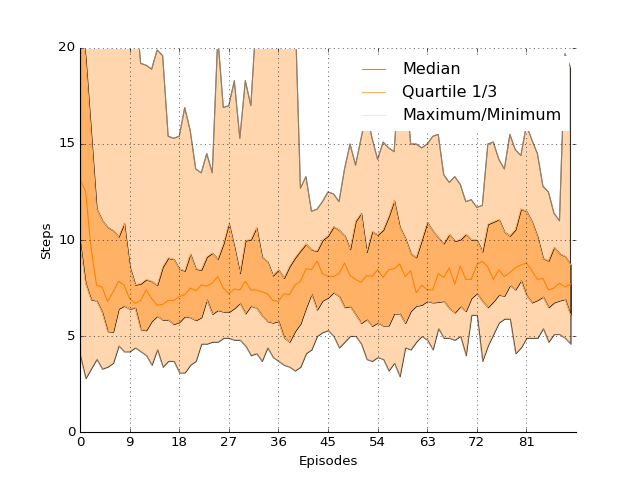

   Step  Min  1st Quartile  Median  3rd quartile  Max
0     0    2          7.25    24.5         43.75  176
1    11    1          2.00     3.5          6.25   18
2    22    1          4.75     6.5         10.50   15
3    33    1          2.75     6.0          8.25   34
4    44    1          2.75     4.0          6.25   23
5    55    1          2.75     5.5          9.00   23
6    66    1          4.00     5.5         12.00   18
7    77    1          2.00     4.5          7.00   23
8    88    1          3.50     8.0         12.00   35
9    99    1          1.75     7.0          9.75   38


<IPython.core.display.Javascript object>


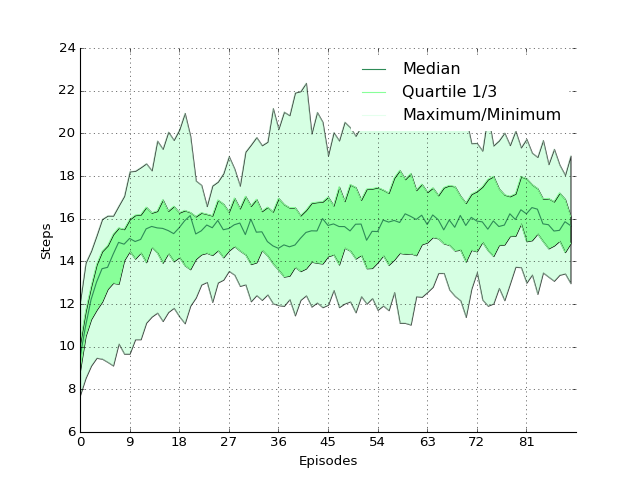

   Step  Min  1st Quartile  Median  3rd quartile    Max
0     0  0.0        0.0000   0.000        0.0000   0.00
1    11  8.0       11.5200  13.630       16.6350  22.40
2    22  0.0       15.3675  18.160       20.0225  24.76
3    33  0.0       15.2550  17.460       19.2550  27.47
4    44  8.0       13.6525  15.025       18.8175  25.91
5    55  8.0       12.7900  14.710       18.3575  24.10
6    66  8.0       14.8450  17.300       19.0700  25.08
7    77  0.0        8.0000  14.160       18.4750  25.94
8    88  0.0       13.2875  17.965       20.2700  27.22
9    99  0.0       10.0175  16.915       20.3800  24.60


In [17]:
plot_centiles(ts_lp_epuck, 20, smooth_factor=10, filename="ts_lp_epuck")

print_table(ts_lp_epuck, 10)

plot_centiles(ps_lp_epuck, smooth_factor=10, color="green", filename="ps_lp_epuck")

print_table(ps_lp_epuck, 10)

## Mann-Whitney Tests

In [22]:
print("Performance: ")
print("\ndp lower than nsm:")
print_MW(ts_dp_epuck, ts_nsm_epuck, 10)
print("\nlp lower than nsm:")
print_MW(ts_lp_epuck, ts_nsm_epuck, 10)
print("\nlp lower than dp:")
print_MW(ts_lp_epuck, ts_dp_epuck, 10)

Performance: 

dp lower than nsm:
         0         11        22        33        44        55        66  \
0  0.950685  0.307094  0.332158  0.725344  0.451363  0.643355  0.643753   

        77        88        99  
0  0.41926  0.808692  0.633253  

lp lower than nsm:
         0         11        22        33        44        55        66  \
0  0.893553  0.034218  0.113515  0.537981  0.054195  0.706982  0.843093   

         77        88        99  
0  0.100695  0.972689  0.607547  

lp lower than dp:
         0       11        22        33       44        55        66  \
0  0.388144  0.1021  0.248285  0.293338  0.05586  0.510848  0.658725   

         77        88        99  
0  0.163559  0.896629  0.643577  


In [28]:
print("Proximity: ")
print("\nnsm lower than dp:")
print_MW(ps_nsm_epuck, ps_dp_epuck, 10)
print("\nnsm lower than lp:")
print_MW(ps_nsm_epuck, ps_lp_epuck, 10)
print("\ndp lower than lp:")
print_MW(ps_dp_epuck, ps_lp_epuck, 10)

Proximity: 

nsm lower than dp:
    0    11        22   33       44        55        66   77   88        99
0  0.0  0.0  0.212213  0.0  0.02491  0.133558  0.261535  0.0  0.0  0.393103

nsm lower than lp:
    0    11        22        33        44        55   66        77        88  \
0  0.0  0.0  0.001204  0.000549  0.002442  0.004857  0.0  0.170905  0.000839   

    99  
0  0.0  

dp lower than lp:
    0    11   22        33   44   55       66        77        88        99
0  0.0  0.0  0.0  0.001725  0.0  0.0  0.00149  0.532523  0.007655  0.047411
